In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats
import seaborn as sns
import math
from matplotlib.ticker import FuncFormatter

## Simulating Gambler's Ruin in Stochastic Betting Scenarios
This simulation models the classic Gambler's Ruin problem, exploring how equity evolves over time under stochastic conditions where each bet involves both risk and reward. By defining starting capital (start), a stopping loss threshold (stop), a target goal (goal), the risk per bet (risk_per_bet), a reward-to-risk ratio (reward_risk_ratio), and the probability of winning (win_probability), the function tracks a gambler's journey.

**The simulation iterates until one of two terminal conditions is met:**

1. The gambler's equity reaches or exceeds the goal (success).
2. The gambler's equity drops below the stopping threshold (early exit).

Each iteration models the outcome of a single bet, either increasing or decreasing equity based on the randomly determined result. The equity history is returned alongside the total number of steps taken, offering insights into the gambler's path.

This simulation highlights key concepts of probability theory, risk management, and expected value, illustrating the delicate interplay between randomness, reward, and ruin.

In [2]:
def gamblers_ruin(start, stop, goal, risk_per_bet, reward_risk_ratio, win_probability):
    # Initialize the simulation history with the starting equity
    simulations = [start]

    # Current equity starts at the initial value
    equity = start
    
    while equity > 0 and equity < goal and equity > stop: 
        # Simulate a win based on the probability of success
        if random.random() < win_probability: 
            # Increase equity by the product of risk, reward ratio, and current equity
            equity += equity * risk_per_bet * reward_risk_ratio
        else:  
            # Simulate a loss: reduce equity by the product of risk and current equity
            equity -= equity * risk_per_bet

        # Record the current equity after each bet
        simulations.append(equity)

    # Return the full equity history and the number of steps in the simulation
    return simulations, len(simulations)


### Visualizing the Gambler's Ruin Simulation
This visualization complements the simulation of the Gambler's Ruin problem by providing a dynamic view of how equity evolves over time. The plot uses color-coded trajectories—green for increases and red for decreases—to illustrate the stochastic nature of betting outcomes. Regions above the starting equity are shaded in green, signaling profit, while regions below are shaded in red, highlighting losses.

Key Features of the Visualization:

- Horizontal reference lines mark the starting equity, goal, and hard stop thresholds, providing clear benchmarks for interpreting results.
- Annotations indicate significant events, such as reaching the goal or hitting the hard stop.
- The maximum drawdown—measuring the deepest equity drop from a peak—and its duration are calculated and displayed to emphasize risk exposure.

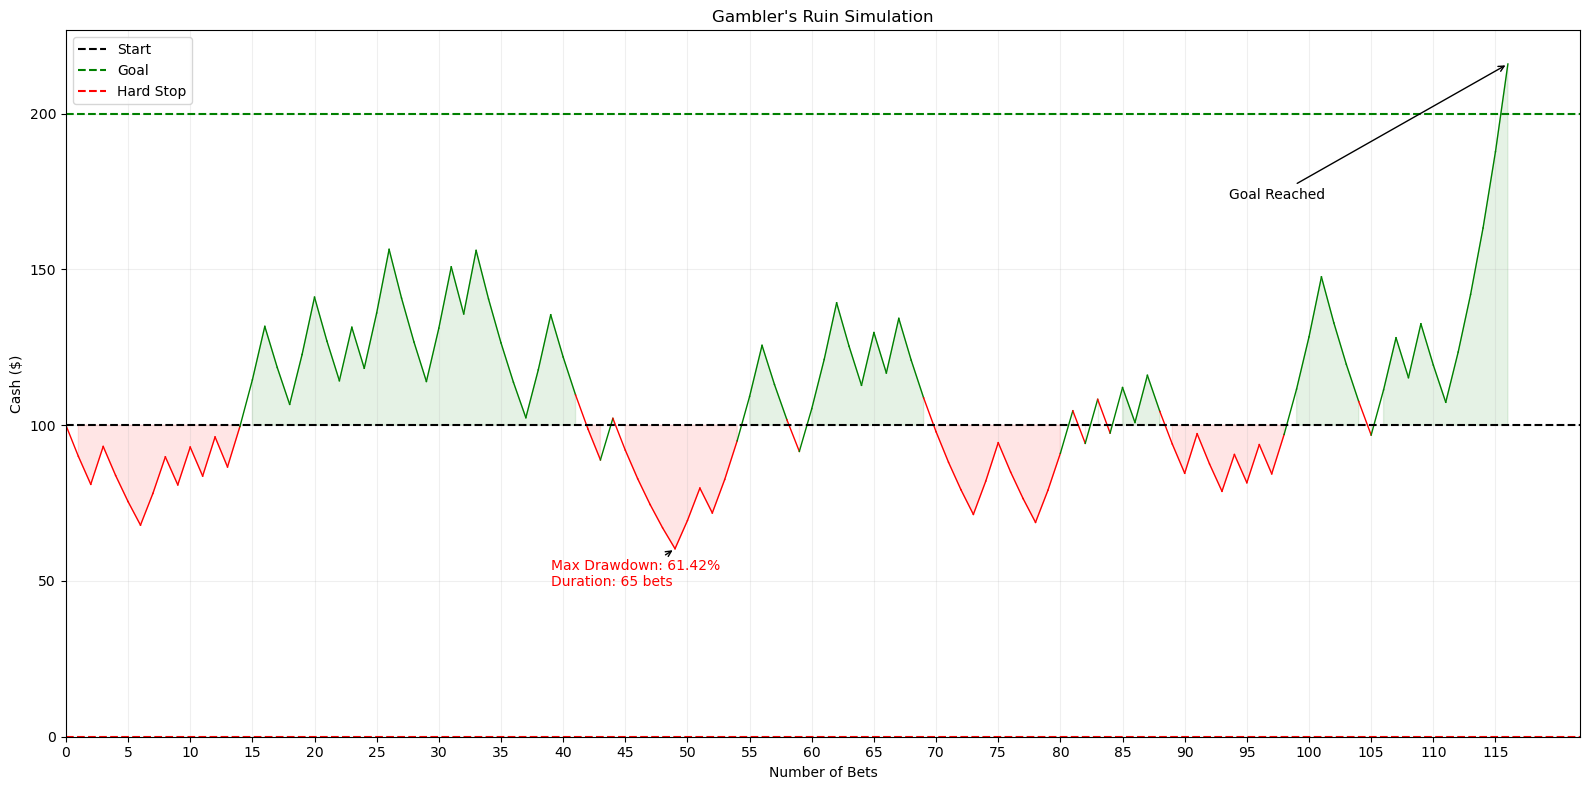

In [3]:
def plot_simulation(start, stop, goal, risk_per_bet, reward_risk_ratio, win_probability):
    simulations, num_bets = gamblers_ruin(start, stop, goal, risk_per_bet, reward_risk_ratio, win_probability)

    max_drawdown, drawdown_start_index, drawdown_duration = calculate_drawdown(simulations)

    plt.figure(figsize=(16, 8))

    for i in range(len(simulations) - 1):
        color = "green" if simulations[i + 1] >= start else "red"
        plt.plot([i, i + 1], [simulations[i], simulations[i + 1]], color=color, linewidth=1)

    plt.fill_between(range(len(simulations)), simulations, start, 
                     where=np.array(simulations) > start, color="green", alpha=0.1)
    plt.fill_between(range(len(simulations)), simulations, start, 
                     where=np.array(simulations) < start, color="red", alpha=0.1)

    plot_reference_lines(start, goal, stop)
    annotate_simulation(simulations, start, goal, stop)
    annotate_drawdown(simulations, max_drawdown, drawdown_start_index, drawdown_duration)

    plt.xlabel("Number of Bets")
    plt.ylabel("Cash ($)")
    plt.title("Gambler's Ruin Simulation")
    plt.legend()
    plt.tight_layout()
    plt.grid(alpha=0.2)
    plt.xticks(ticks=[x for x in range(0, len(simulations) + 1) if x % (len(simulations)// 20) == 0])
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.show()


def calculate_drawdown(simulations):
    """Calculate max drawdown and duration."""
    peaks = [simulations[0]]
    max_drawdown, drawdown_start_index, drawdown_recovery_index = 0, 0, 0
    current_peak = simulations[0]

    for i, value in enumerate(simulations):
        if value > current_peak:
            current_peak = value
            peaks.append(current_peak)
        else:
            drawdown = (current_peak - value) / current_peak
            if drawdown > max_drawdown:
                max_drawdown = drawdown
                drawdown_start_index = i
                drawdown_recovery_index = next(
                    (j for j in range(i, len(simulations)) if simulations[j] >= current_peak),
                    len(simulations) - 1
                )
    drawdown_duration = drawdown_recovery_index - drawdown_start_index
    return max_drawdown, drawdown_start_index, drawdown_duration


def plot_reference_lines(start, goal, stop):
    """Plot start, goal, and stop lines."""
    plt.axhline(y=start, color='black', linestyle='--', label="Start")
    plt.axhline(y=goal, color='green', linestyle='--', label="Goal")
    plt.axhline(y=stop, color='red', linestyle='--', label="Hard Stop")


def annotate_simulation(simulations, start, goal, stop):
    """Annotate final state of the simulation."""
    if simulations[-1] >= goal:
        plt.annotate("Goal Reached", xy=(len(simulations) - 1, simulations[-1]), 
                     xytext=(len(simulations) * 0.8, simulations[-1] * 0.8),
                     arrowprops=dict(facecolor='black', arrowstyle="->"))
    elif simulations[-1] <= stop:
        plt.annotate("Hard Stop", xy=(len(simulations) - 1, stop), 
                     xytext=(len(simulations) * 0.8, stop + (start - stop) * 0.1),
                     arrowprops=dict(facecolor='red', arrowstyle="->"))


def annotate_drawdown(simulations, max_drawdown, drawdown_start_index, drawdown_duration):
    """Annotate max drawdown details."""
    drawdown_annotation = f"Max Drawdown: {max_drawdown:.2%}\nDuration: {drawdown_duration} bets"
    plt.annotate(drawdown_annotation,
                 xy=(drawdown_start_index, simulations[drawdown_start_index]),
                 xytext=(max(0, drawdown_start_index - 10), simulations[drawdown_start_index] * 0.8),
                 arrowprops=dict(facecolor='red', arrowstyle="->"),
                 fontsize=10, color="red")

start = 100
stop = 0
goal = 2 * start
risk_per_bet = 0.10
reward_risk_ratio = 1.5
win_probability = 0.51

plot_simulation(start, stop, goal, risk_per_bet, reward_risk_ratio, win_probability)

## Simulation, the Law of Large Numbers, and Distribution Analysis

The presented code exemplifies a simulation-based exploration of the **Gambler's Ruin** problem, showcasing the interplay between stochastic processes and statistical regularities. This simulation leverages the **law of large numbers** and distributional analysis to reveal how aggregate behavior emerges from individual probabilistic events.

#### Simulation Framework
The primary goal is to model the evolution of a gambler's equity over time, where each bet involves a defined risk, a win probability, and a reward-to-risk ratio. The gambler aims to either reach a predefined cash goal or stop when their funds are depleted. This is repeated across `num_simulations` independent trials to capture variability in outcomes.

1. **Simulating Individual Trials:**
   Each trial tracks the gambler's cash over successive bets, using random outcomes based on the win probability. These simulations are visualized with time-series plots, illustrating how individual trajectories oscillate toward the **goal** or the **hard stop**.

2. **Aggregating Results:**
   Outcomes from all trials are classified as either "goal reached" or "hard stop," and the number of bets taken is recorded for each trial. This data forms the basis for distributional analysis and statistical summaries.

#### Law of Large Numbers in Action
As the number of simulations increases, the observed frequencies of reaching the goal or hitting the stop converge toward their theoretical probabilities, a manifestation of the **law of large numbers**. This phenomenon underscores the stabilizing effect of large sample sizes in probabilistic systems, revealing consistent aggregate behavior despite individual randomness.

#### Distributional Insights
The distribution of the number of bets taken before an outcome is achieved offers valuable insights into the dynamics of the process:
- **Shape of the Distribution:** A histogram of bets typically shows a right-skewed distribution, where most trials terminate after a moderate number of bets, but a few require significantly more.
- **Central Tendency Measures:** The mean, median, and mode provide complementary perspectives on the "typical" number of bets, while the presence of outliers highlights the variability in gambler trajectories.
- **Key Observations:** By overlaying these measures on the histogram, the simulation emphasizes how often the gambler's fate aligns with the expected outcome, while still allowing for rare, extreme cases.


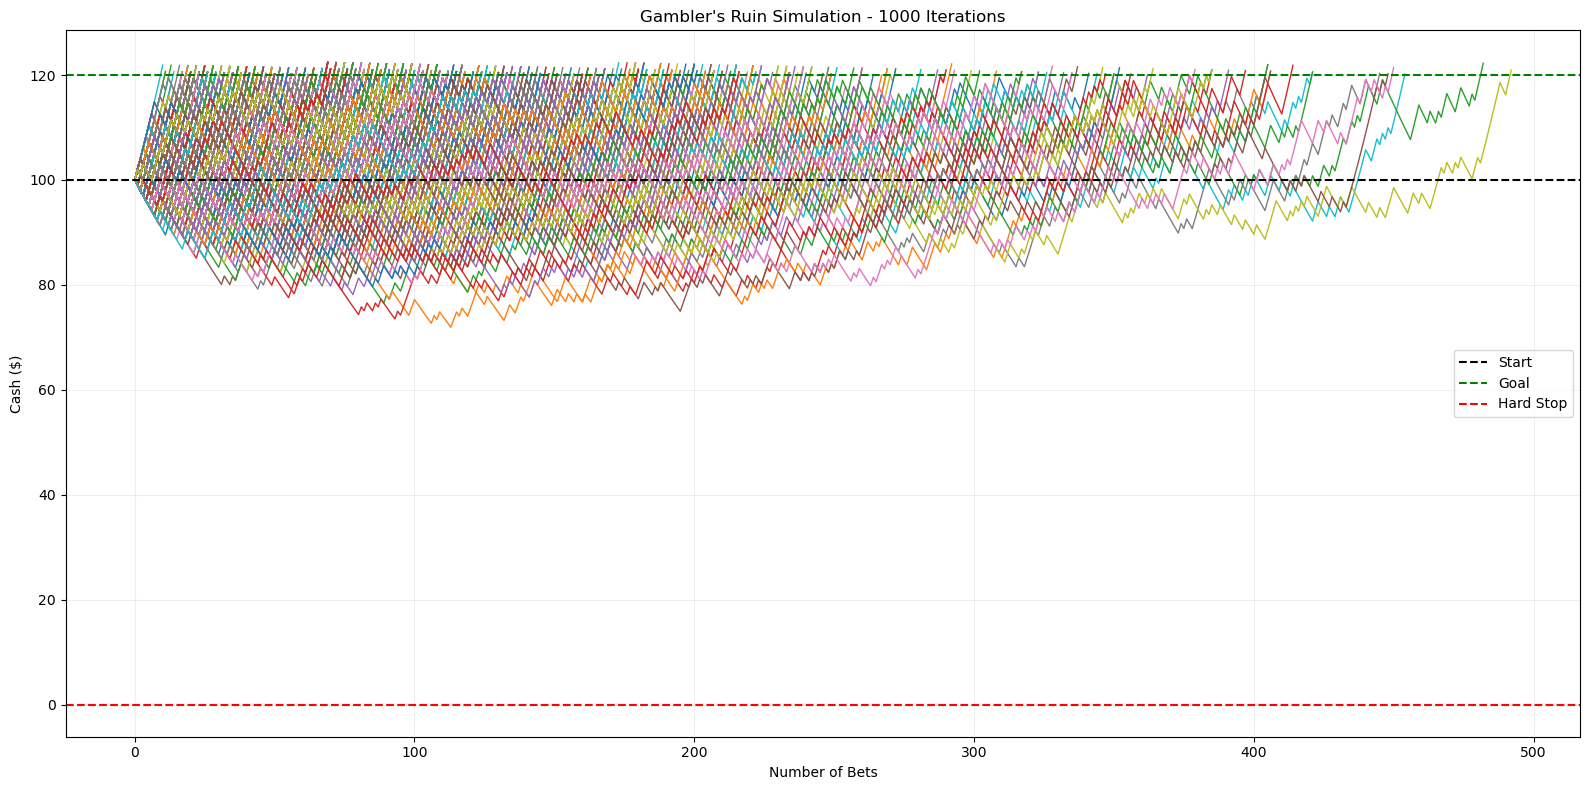

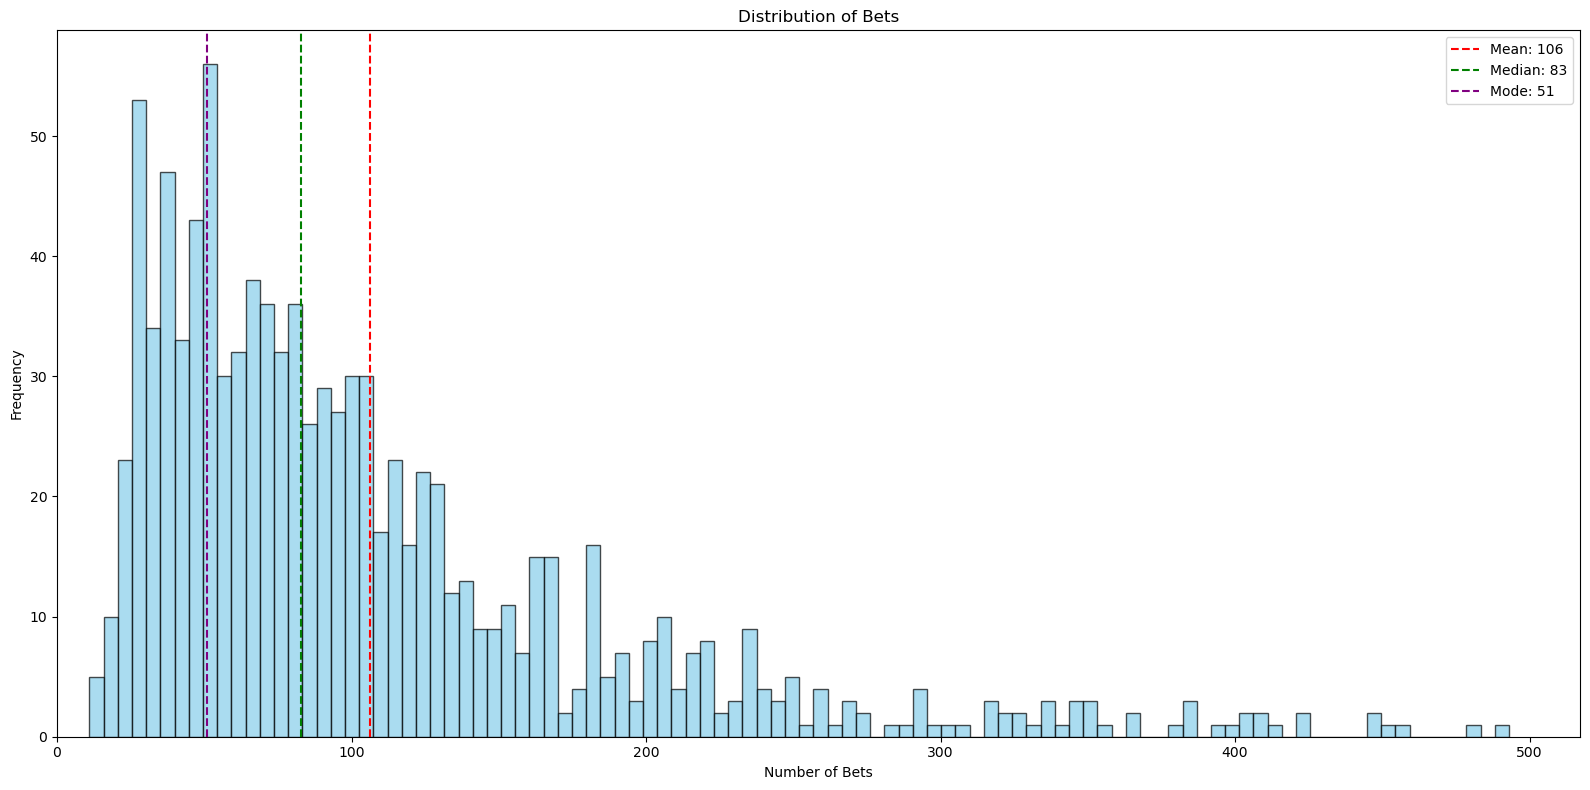

Out of 1000 simulations:
  - Goal Reached: 1000 times (100.0%)
  - Hard Stopped: 0 times (0.0%)
Average number of bets per simulation: 106
Median number of bets per simulation: 83
Mode number of bets per simulation: 51


In [4]:
def plot_multiple_simulations(num_simulations, start, stop, goal, risk_per_bet, reward_risk_ratio, win_probability):

    outcomes = {"goal": 0, "stop": 0}  # Track outcomes
    all_iterations = []  # Track number of bets per simulation

    plt.figure(figsize=(16, 8))  # Initialize plot

    for _ in range(num_simulations):
        # Run a single simulation
        simulations, num_bets = gamblers_ruin(start, stop, goal, risk_per_bet, reward_risk_ratio, win_probability)
        plt.plot(simulations, linewidth=1)  # Plot individual simulation

        # Check the final outcome
        final_cash = simulations[-1]
        outcomes["goal"] += final_cash >= goal
        outcomes["stop"] += final_cash <= stop

        # Store the number of bets for this simulation
        all_iterations.append(num_bets)

    # Add reference lines for start, goal, and stop
    plt.axhline(start, color='black', linestyle='--', label="Start")
    plt.axhline(goal, color='green', linestyle='--', label="Goal")
    plt.axhline(stop, color='red', linestyle='--', label="Hard Stop")

    # Format the plot
    plt.title(f"Gambler's Ruin Simulation - {num_simulations} Iterations")
    plt.xlabel("Number of Bets")
    plt.ylabel("Cash ($)")
    plt.grid(alpha=0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return outcomes, all_iterations


def analyze_simulation_results(all_iterations, outcomes, num_simulations):

    # Calculate statistical measures
    avg_iterations = sum(all_iterations) / len(all_iterations)  # Mean
    median_iterations = np.median(all_iterations)  # Median
    mode_iterations = stats.mode(all_iterations, keepdims=False)[0]  # Mode

    # Plot the distribution of the number of bets
    plt.figure(figsize=(16, 8))
    plt.hist(all_iterations, bins=int(len(all_iterations)/10), color="skyblue", edgecolor="black", alpha=0.7)

    # Highlight statistical measures
    plt.axvline(avg_iterations, color="red", linestyle="--", label=f'Mean: {round(avg_iterations)}')
    plt.axvline(median_iterations, color="green", linestyle="--", label=f'Median: {round(median_iterations)}')
    plt.axvline(mode_iterations, color="purple", linestyle="--", label=f'Mode: {round(mode_iterations)}')

    # Add labels and title
    plt.xlabel("Number of Bets")
    plt.ylabel("Frequency")
    plt.title("Distribution of Bets")
    plt.xlim(0)
    plt.ylim(0)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print simulation results summary
    print(f"Out of {num_simulations} simulations:")
    print(f"  - Goal Reached: {outcomes['goal']} times ({outcomes['goal'] / num_simulations:.1%})")
    print(f"  - Hard Stopped: {outcomes['stop']} times ({outcomes['stop'] / num_simulations:.1%})")
    print(f"Average number of bets per simulation: {round(avg_iterations)}")
    print(f"Median number of bets per simulation: {round(median_iterations)}")
    print(f"Mode number of bets per simulation: {round(mode_iterations)}")


# Parameters for the simulation
cash = 100  # Initial cash
goal = 1.2 * cash  # Goal threshold (120% of starting cash)
stop = 0  # Hard stop threshold
risk_per_bet = 0.01  # Fraction of cash risked per bet
reward_risk_ratio = 2.0  # Reward-to-risk ratio
win_probability = 0.40  # Probability of winning a single bet
num_simulations = 1000  # Number of simulations to run

# Run simulations and analyze results
outcomes, all_iterations = plot_multiple_simulations(
    num_simulations, cash, stop, goal, risk_per_bet, reward_risk_ratio, win_probability)
analyze_simulation_results(all_iterations, outcomes, num_simulations)

## Analyzing Stock Market Trends Using Multi-State Representation

The provided code demonstrates a methodical approach to downloading historical stock market data and transforming it into a **multi-state framework** to capture market dynamics. By leveraging Yahoo Finance's API through the `yfinance` library, the function retrieves and preprocesses adjusted closing prices for a given ticker symbol over a specified date range.

#### Key Features
1. **Extended Data Range for SMA Calculation:**
   To facilitate accurate calculations, such as moving averages, the start date is adjusted backward by 365 days, ensuring sufficient historical data.

2. **Data Transformation:**
   - **Percentage Change:** Computes daily percentage changes in adjusted closing prices to capture short-term market movements.
   - **State Generation:** 
     - Binary states (`U` for upward movement and `D` for downward movement) are derived from daily percentage changes.
     - These states are iteratively combined to form sequences of 4, 8, and 16 states, encapsulating patterns over multiple days and enabling a deeper understanding of market transitions.

3. **Filtering and Data Integrity:**
   Rows with missing values are removed to maintain data consistency, and the dataset is filtered to match the original date range.

In [36]:
def download_stock_data(ticker_symbol, start_date="1980-01-01", end_date="2025-01-01"):
    # Adjust the start date to fetch data 200 days earlier for SMA calculation
    adjusted_start_date = pd.to_datetime(start_date) - pd.Timedelta(days=365)
    
    # Download data with the adjusted start date
    data = yf.download(ticker_symbol, adjusted_start_date.strftime('%Y-%m-%d'), end_date, progress=False)
    
    # Calculate percentage change
    data['Pct_Change'] = data['Adj Close'].pct_change()
    
    # Generate state columns
    data['2_States'] = data['Pct_Change'].apply(lambda x: 'U' if x > 0 else 'D')
    data['4_States'] = data['2_States'].shift(1) + data['2_States']
    data['8_States'] = data['4_States'].shift(1) + data['2_States']
    data['16_States'] = data['8_States'].shift(1) + data['2_States']
    data['32_States'] = data['16_States'].shift(1) + data['2_States']

    # Drop rows with NaN values
    data.dropna(inplace=True)
    
    # Filter data to only include rows from the original start_date onward
    filtered_data = data[start_date:end_date]

    print(f"Downloaded ${ticker_symbol}, starting from {filtered_data.index[0].strftime('%Y-%m-%d')} to {filtered_data.index[-1].strftime('%Y-%m-%d')}")

    return filtered_data

# Example usage
ticker_symbol = "SPY"
start_date = "2010-01-01"
end_date = "2025-01-01"
stock_data = download_stock_data(ticker_symbol, start_date, end_date)
stock_data.head(10)

Downloaded $SPY, starting from 2010-01-04 to 2024-12-31


,Open,High,Low,Close,Adj Close,Volume,Pct_Change,2_States,4_States,8_States,16_States,32_States
Date,,,,,,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,86.026466,118944600,0.016960,U,DU,DDU,DDDU,UDDDU
2010-01-05,113.260002,113.680000,112.849998,113.629997,86.254166,111579900,0.002647,U,UU,DUU,DDUU,DDDUU
2010-01-06,113.519997,113.989998,113.430000,113.709999,86.314903,116074400,0.000704,U,UU,UUU,DUUU,DDUUU
2010-01-07,113.500000,114.330002,113.180000,114.190002,86.679253,131091100,0.004221,U,UU,UUU,UUUU,DUUUU
2010-01-08,113.889999,114.620003,113.660004,114.570000,86.967720,126402800,0.003328,U,UU,UUU,UUUU,UUUUU
2010-01-11,115.080002,115.129997,114.239998,114.730003,87.089165,106375700,0.001396,U,UU,UUU,UUUU,UUUUU
2010-01-12,113.970001,114.209999,113.220001,113.660004,86.276947,163333500,-0.009326,D,UD,UUD,UUUD,UUUUD
2010-01-13,113.949997,114.940002,113.370003,114.620003,87.005653,161822000,0.008446,U,DU,UDU,UUDU,UUUDU
2010-01-14,114.489998,115.139999,114.419998,114.930000,87.240974,115718800,0.002705,U,UU,DUU,UDUU,UUDUU


### Calculating Transition Matrices in a Markov Chain Framework

A **Markov Chain** is a mathematical model used to describe systems that transition between a finite number of states, where the probability of transitioning to a future state depends only on the current state and not on the sequence of events that preceded it. This property is known as the **memoryless property** or **Markov property**.

In the context of stock market analysis, states represent different market conditions (e.g., up or down price movements), and the transitions between these states represent the probabilities of moving from one condition to another. 

A **transition matrix** is a square matrix used to represent the transitions of a Markov Chain. The rows of the matrix correspond to the current state, while the columns correspond to the next state. The entries in the matrix represent the probability of transitioning from one state to another.

In the code:
- We compute transition matrices for several state representations (2, 4, 8, and 16 states) based on the daily price movements of the stock.
- For each state representation, the **`pd.crosstab`** function is used to count the transitions between consecutive states, and the result is normalized to represent probabilities.


In [37]:
# Function to calculate transition matrix
def transition_matrix(states):
    # Count the frequency of transitions between consecutive states
    # The crosstab function creates a matrix where rows represent the current state
    # and columns represent the next state. The `normalize="index"` argument scales
    # the counts to probabilities, with each row summing to 1.
    transitions = pd.crosstab(states[:-1], states[1:], normalize="index")
    return transitions

# Step 5: Calculate transition matrices for different state representations
matrix_2_states = transition_matrix(stock_data['2_States'].values)  # Transition matrix for 2-state representation
matrix_4_states = transition_matrix(stock_data['4_States'].values)  # Transition matrix for 4-state representation
matrix_8_states = transition_matrix(stock_data['8_States'].values)  # Transition matrix for 8-state representation
matrix_16_states = transition_matrix(stock_data['16_States'].values)  # Transition matrix for 16-state representation
matrix_32_states = transition_matrix(stock_data['32_States'].values)  # Transition matrix for 16-state representation

matrix_32_states

col_0,DDDDD,DDDDU,DDDUD,DDDUU,DDUDD,DDUDU,DDUUD,DDUUU,DUDDD,DUDDU,...,UDUUD,UDUUU,UUDDD,UUDDU,UUDUD,UUDUU,UUUDD,UUUDU,UUUUD,UUUUU
row_0,,,,,,,,,,,,,,,,,,,,,
DDDDD,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DDDDU,0.000000,0.000000,0.463415,0.536585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DDDUD,0.000000,0.000000,0.000000,0.000000,0.406977,0.593023,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DDDUU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.435644,0.564356,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DDUDD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466667,0.533333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DDUDU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DDUUD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DDUUU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DUDDD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Steady State in Markov Chains and Its Significance

The provided code calculates the **power of a transition matrix** using recursion, which is crucial in Markov Chain analysis for studying the long-term behavior of a system. Specifically, it applies this concept to the **transition matrix** of the market states to explore the system's behavior over many iterations (in this case, 100 steps).

#### Code Explanation
1. **Matrix Power Calculation:**
   - The function `matrix_power(matrix, power)` recursively calculates the matrix raised to a given power. This is essential for understanding the system's state after multiple transitions.
   - If `power == 0`, it returns the identity matrix, which corresponds to no change in the system. If `power == 1`, it returns the matrix itself (one step of transition). Otherwise, it recursively multiplies the matrix by itself, which simulates multiple transitions.
   
2. **Applying Matrix Power:**
   - The `apply_matrix_power(matrix, power)` function converts the matrix to a NumPy array, applies the matrix power, and converts it back to a Pandas DataFrame for easier analysis.
   - This function is particularly useful when studying the **steady-state probabilities** by iterating many steps in a Markov Chain.

#### Significance of Steady State

In the context of **Markov Chains**, a **steady state** refers to the condition where the system's probabilities no longer change with further transitions. Mathematically, this is when the system has reached equilibrium, and the transition matrix no longer alters the distribution of states as additional steps are taken.

Key points about the **steady state**:
1. **Long-Term Behavior:**
   The steady state represents the long-term distribution of states in a Markov Chain. No matter how many steps the chain takes, the system will eventually settle into a stable distribution. For instance, in the stock market example, it describes the likelihood of being in specific market conditions (such as "up" or "down") after many transitions.

2. **Markov Chain Equilibrium:**
   In Markov Chains, the steady state can be found by raising the transition matrix to a high power. As the power increases, the influence of initial conditions fades, and the system's behavior stabilizes. This is what the code achieves by computing the matrix raised to a large power (e.g., `100`).

3. **Practical Implications:**
   - **Predicting Long-Term Outcomes:** By analyzing the steady-state probabilities, investors or analysts can predict the likelihood of being in a particular market state after many periods, regardless of the starting conditions.
   - **Stationary Distribution:** In a steady state, the system is said to be in a **stationary distribution**, where the probabilities of moving between states are constant. This can help in understanding the enduring characteristics of a market, such as volatility or growth.
   
In summary, the steady state in Markov Chains reveals the system's long-term equilibrium, and the function `matrix_power` helps simulate and study this steady behavior. Understanding this equilibrium is essential for modeling complex systems, such as stock prices, where long-term trends and probabilities are crucial for decision-making.

In [7]:
def matrix_power(matrix, power):
    if power == 0:
        return np.identity(len(matrix))
    elif power == 1:
        return matrix
    else:
        return np.dot(matrix, matrix_power(matrix, power-1))

def apply_matrix_power(matrix, power):
    headers = matrix.columns
    index = matrix.index
    df = pd.DataFrame(matrix_power(matrix.to_numpy(), power), columns=headers, index=index)
    return df

result = apply_matrix_power(matrix_4_states, 100)
result

col_0,DD,DU,UD,UU
row_0,,,,
DD,0.195448,0.251671,0.251671,0.30121
DU,0.195448,0.251671,0.251671,0.30121
UD,0.195448,0.251671,0.251671,0.30121
UU,0.195448,0.251671,0.251671,0.30121


### Kelly Criterion and Its Significance in Trading

The **Kelly Criterion** is a mathematical formula used to determine the optimal size of a series of bets or investments to maximize long-term growth while minimizing the risk of losing everything. It is a widely recognized strategy in the fields of gambling, finance, and investing.

#### Code Explanation

The `calculate_kelly_criterion` function in the provided code calculates the Kelly Criterion for trading based on the **Markov Chain state transitions**. Here’s how it works:

1. **Data Preparation:**
   - The function takes two inputs: `stock_data`, which contains the stock data with various market states, and `matrix_states`, which represents the transition matrix of those states.
   - The function maps the number of states (2, 4, 8, or 16) to the appropriate state column (`'2_States'`, `'4_States'`, etc.) in the stock data.
   
2. **Win and Loss Calculation:**
   - The function loops through the stock data and compares the current state (`state_column`) with the next data point. It determines if the percentage change (`Pct_Change`) is positive or negative to classify it as a win or loss.
   - **Wins** are accumulated in `total_win` and **losses** in `total_loss`.
   - The function also counts the number of wins (`win_count`) and losses (`lose_count`) for calculating the average win and loss rates.

3. **Kelly Criterion Calculation:**
   - The **Kelly Formula** is applied to determine the optimal bet size: $$K = p - \frac{(1 - p)}{\frac{A_w}{|A_l|}}$$
     where:
     - $p$ is the probability of a win (from the transition matrix),
     - $A_w$ is the average win percentage,
     - $A_l$ s the average loss percentage.
   - If there are no losses (i.e., `avg_loss == 0`), the Kelly criterion is set to zero, as the formula would become undefined.
  
4. **Output:**
   - The function outputs several key results: the average win, average loss, number of wins, number of losses, and the final **Kelly Criterion** value.

#### Significance

1. **Optimal Bet Sizing:**
   The Kelly Criterion is significant because it suggests the optimal proportion of capital to bet (or invest) based on the likelihood of a win and the ratio of average win to average loss. By using this method, investors can maximize their long-term growth without risking large portions of their capital on unfavorable trades.

2. **Risk Management:**
   It inherently balances the risk-reward trade-off by scaling bets or investments based on past performance (wins and losses). If the expected return per trade is high relative to risk, the formula will recommend a larger bet size, but if the risk is too high compared to the potential reward, the bet size will be smaller.

3. **Financial Strategy:**
   In the context of stock trading, applying the Kelly Criterion using historical market states (such as "up" or "down" trends) provides a data-driven approach to adjust trading behavior over time. By adjusting the size of each trade, traders can avoid large losses while potentially achieving higher growth rates, compared to fixed bet or investment sizes.

4. **Maximizing Growth:**
   The key idea behind the Kelly Criterion is that over many trades or investments, following the optimal bet size will lead to the maximum possible growth rate of wealth. It avoids both overbetting (which risks bankruptcy) and underbetting (which prevents maximizing wealth).

In [39]:
def calculate_kelly_criterion(stock_data, matrix_states):
    total_win = 0
    total_loss = 0
    win_count = 0
    lose_count = 0

    num_of_states = len(matrix_states)

    state_to_col = {2: '2_States', 4: '4_States', 8: '8_States', 16: '16_States', 32: "32_States"}

    # Retrieve the appropriate column name based on num_of_states
    if num_of_states not in state_to_col:
        raise ValueError(f"Invalid num_of_states: {num_of_states}. Must be one of {list(state_to_col.keys())}")


    state_column = state_to_col[num_of_states]

    # Access the probability value from the matrix
    winning_probability = matrix_states.iloc[0, 1]  # Assume it's in the second column of the matrix

    for index in range(len(stock_data) - 1):
        current_row = stock_data.iloc[index]
        next_row = stock_data.iloc[index + 1]

        if current_row[state_column] == 'D'*int((math.log2(num_of_states))):
            pct_change = next_row['Pct_Change']  # Access the percentage change
            
            # Determine if the trade is a win or loss
            if pct_change > 0:
                total_win += pct_change
                win_count += 1
            else:
                total_loss += pct_change
                lose_count += 1

    avg_win = total_win / win_count if win_count > 0 else 0
    avg_loss = total_loss / lose_count if lose_count > 0 else 0

    # Calculate Kelly criterion
    kelly = winning_probability - ((1 - winning_probability) / (avg_win / abs(avg_loss))) if avg_loss != 0 else 0

    # Print results
    print(f"For {num_of_states} States")
    print(f"  - Average Win: {avg_win * 100:.1f}%")
    print(f"  - Average Loss: {avg_loss * 100:.1f}%")
    print(f"  - Win Count: {win_count}")
    print(f"  - Lose Count: {lose_count}")
    print(f"  - Kelly Criterion: {kelly * 100:.1f}%")

    return avg_win, avg_loss, win_count, lose_count, kelly

# Example usage:
states_list = [matrix_2_states, matrix_4_states, matrix_8_states, matrix_16_states, matrix_32_states]

for matrix_states in states_list:
    avg_win, avg_loss, win_count, lose_count, kelly_ceriteria = calculate_kelly_criterion(stock_data, matrix_states)

For 2 States
  - Average Win: 0.8%
  - Average Loss: -0.9%
  - Win Count: 949
  - Lose Count: 737
  - Kelly Criterion: 9.3%
For 4 States
  - Average Win: 0.9%
  - Average Loss: -0.9%
  - Win Count: 416
  - Lose Count: 320
  - Kelly Criterion: 11.1%
For 8 States
  - Average Win: 1.0%
  - Average Loss: -0.9%
  - Win Count: 186
  - Lose Count: 133
  - Kelly Criterion: 18.6%
For 16 States
  - Average Win: 1.1%
  - Average Loss: -1.1%
  - Win Count: 82
  - Lose Count: 51
  - Kelly Criterion: 22.5%
For 32 States
  - Average Win: 1.4%
  - Average Loss: -1.5%
  - Win Count: 34
  - Lose Count: 17
  - Kelly Criterion: 31.2%


### Simulating a Trading Strategy Based on State Transitions in Stock Data

This code simulates a trading strategy based on state transitions in stock data, applying concepts from Markov Chains and the Kelly Criterion to optimize trading decisions. The strategy is implemented by utilizing different state representations of stock price movements, such as 2, 4, 8, and 16 states, and calculating the corresponding cash trajectory over time. Below is a breakdown of the key components:

1. **Data Downloading (`download_stock_data`)**:
   The function fetches historical stock data for a given ticker symbol (e.g., SPY), starting from a specified date. It processes the data by calculating percentage changes and creating multiple state representations based on the direction of price movements. These states are used for simulating transitions over time.

2. **State Transition Matrix**:
   The strategy is based on the assumption that stock price movements follow certain patterns that can be modeled as state transitions. The code calculates transition matrices for different state representations (2, 4, 8, 16 states), using the percentage change in the stock price to determine if the market goes up or down.

3. **Simulating the Trading Strategy (`simulate_strategy`)**:
   - The function simulates trades based on the state transitions. Cash is updated according to the percentage change in stock prices, and the trajectory of cash balance is tracked over time.
   - It uses the state data to decide whether to enter a trade (if the current state is 'AD'). The cash balance evolves as each trade is made, and the simulation tracks the number of trades and the maximum drawdown (the peak-to-trough decline in the account balance).
   - Visualizations of the cash balance and maximum drawdown are generated to provide insights into the performance of the strategy over time.

4. **Max Drawdown and Cash Balance Visualization**:
   - The code includes two main visualizations: one showing the cash balance trajectory over time, and another showing the maximum drawdown (the largest loss from a peak).
   - The cash trajectory is color-coded to highlight periods of profit (green) and loss (red), while the drawdown plot displays the percentage of the maximum loss at each point in the simulation.

5. **Key Insights and Output**:
   - The simulation outputs the final cash balance and the total number of trades made, offering a clear view of the strategy's performance.
   - The analysis of drawdowns provides valuable insight into the risk of the strategy, helping assess the worst-case scenarios and evaluate the risk-reward ratio.

Downloaded $SPY, starting from 2007-01-03 to 2019-12-31


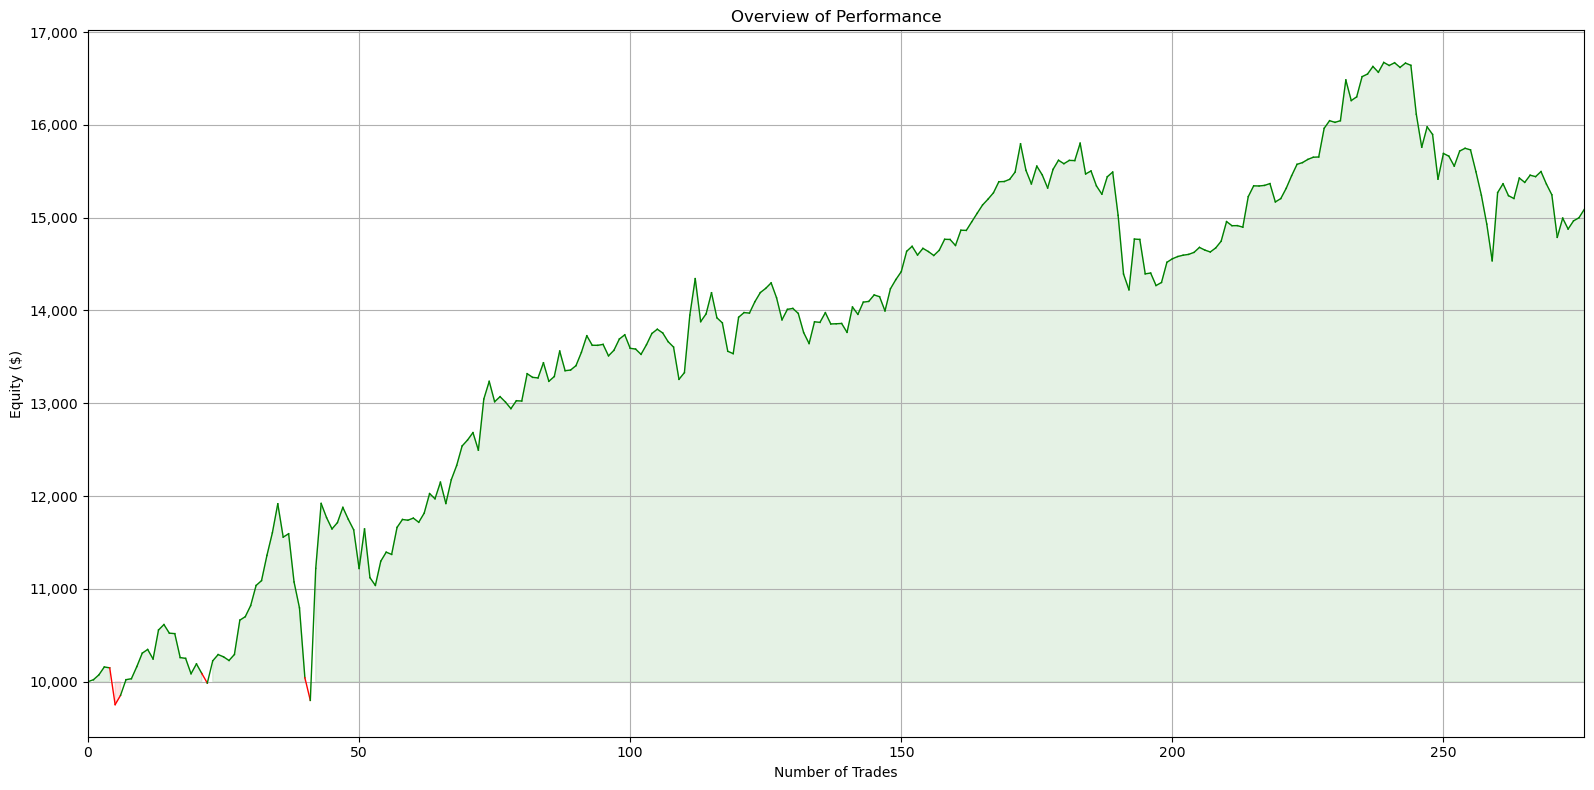

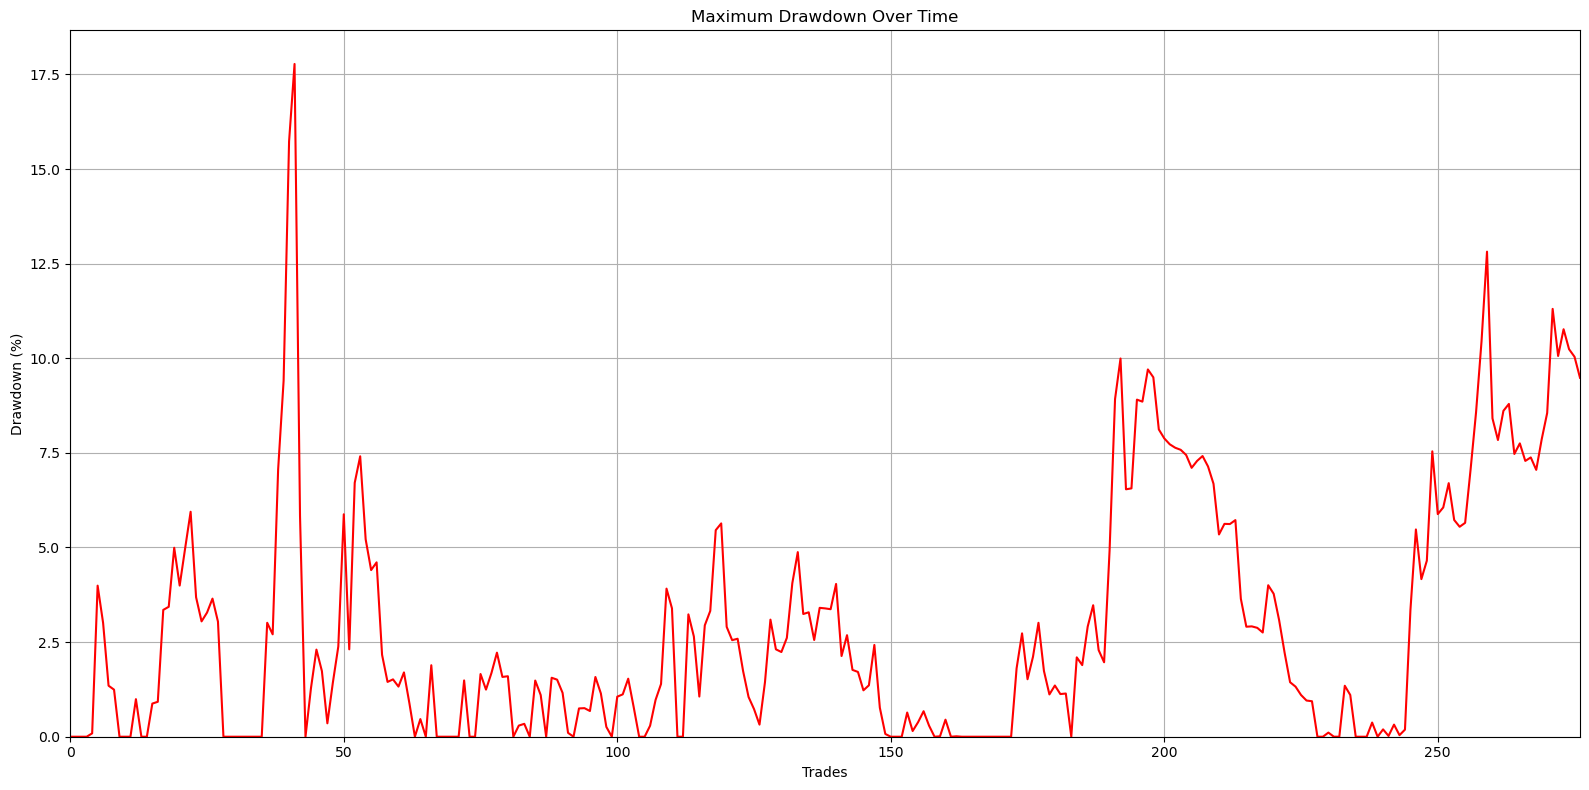

Final Cash: $12,330.53


In [41]:
def simulate_strategy(cash, stock_data, num_of_states):

    start = cash
    equity_record = [cash]  # To store the cash trajectory
    max_cash = cash  # Track the highest value of cash for max drawdown calculation
    drawdowns = [0]  # To store the drawdowns

    # Map state sizes to the corresponding state column in stock data
    state_to_col = {2: '2_States', 4: '4_States', 8: '8_States', 16: '16_States', 32: '32_States'}

    # Retrieve the appropriate column name based on num_of_states
    if num_of_states not in state_to_col:
        raise ValueError(f"Invalid num_of_states: {num_of_states}. Must be one of {list(state_to_col.keys())}")

    state_column = state_to_col[num_of_states]

    # Iterate through the DataFrame and execute strategy
    for index in range(len(stock_data) - 1):  # Avoid out-of-bounds on the last row
        # Access current and next day's price and pct_change
        current_row = stock_data.iloc[index]
        next_row = stock_data.iloc[index + 1]
        state = current_row[state_column]
        next_state = next_row[state_column]

        if state == 'D'*int((math.log2(num_of_states))):
            # Calculate the amount gained or lost on the next day
            pct_change = next_row['Pct_Change']
            cash += cash * pct_change  # Cash change is based on pct_change of the next day
            
            # Update the cash value
            equity_record.append(cash)
        
            # Track max drawdown (the difference between max_cash and current cash)
            max_cash = max(max_cash, cash)
            drawdowns.append((max_cash - cash) / max_cash * 100)

    plot_results_against_trade(equity_record, drawdowns, start)

    return equity_record

def plot_results_against_trade(equity_record, drawdowns, start):
    # Plotting the results
    plt.figure(figsize=(16, 8))
    # Cash trajectory plot
    for i in range(len(equity_record) - 1):
        color = "green" if equity_record[i + 1] >= start else "red"
        plt.plot([i, i + 1], [equity_record[i], equity_record[i + 1]], color=color, linewidth=1)

    plt.fill_between(range(len(equity_record)), equity_record, start, 
                     where=np.array(equity_record) > start, color="green", alpha=0.1)
    plt.fill_between(range(len(equity_record)), equity_record, start, 
                     where=np.array(equity_record) < start, color="red", alpha=0.1)

    plt.title('Overview of Performance')
    plt.xlabel('Number of Trades')
    plt.ylabel('Equity ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
    # plt.yscale('log')  # Set y-axis to log scale
    plt.xlim(0, len(equity_record) - 1)

    # Max Drawdown plot
    plt.figure(figsize=(16, 8))
    plt.plot(drawdowns, label='Max Drawdown', color='red')
    plt.title('Maximum Drawdown Over Time')
    plt.xlabel('Trades')
    plt.ylabel('Drawdown (%)')
    plt.xlim(0, len(equity_record) - 1)
    plt.ylim(bottom=0)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


cash = 10000
num_of_states = 8
ticker_symbol = "SPY"
start_date = "2007-01-01"
end_date = "2020-01-01"
stock_data = download_stock_data(ticker_symbol, start_date, end_date)
equity_record = simulate_strategy(cash, stock_data, num_of_states)

print(f"Final Cash: ${simulations[-1]:,.2f}")

Downloaded $SPY, starting from 2007-01-03 to 2009-12-31


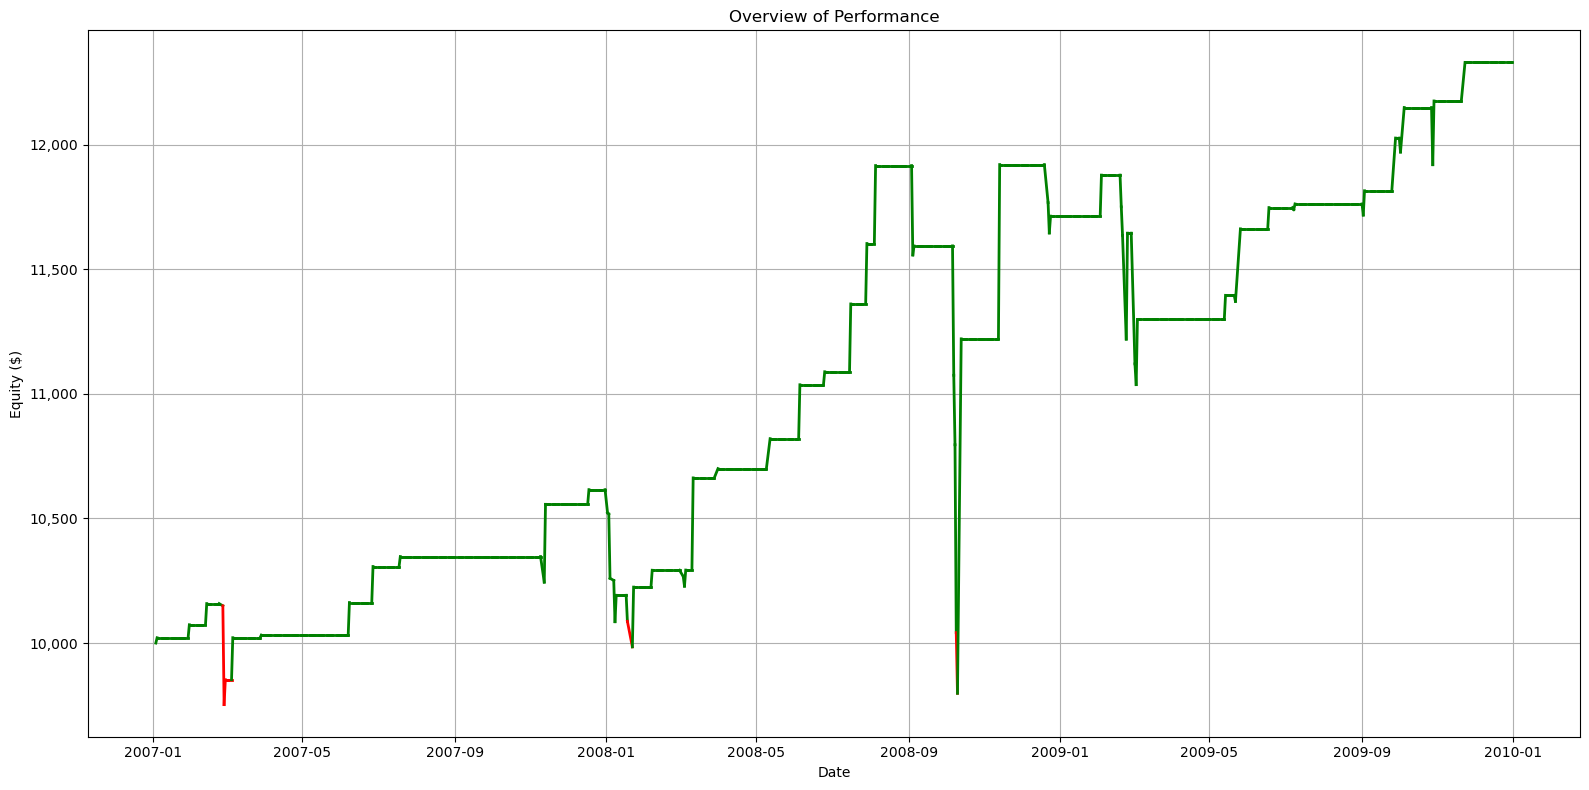

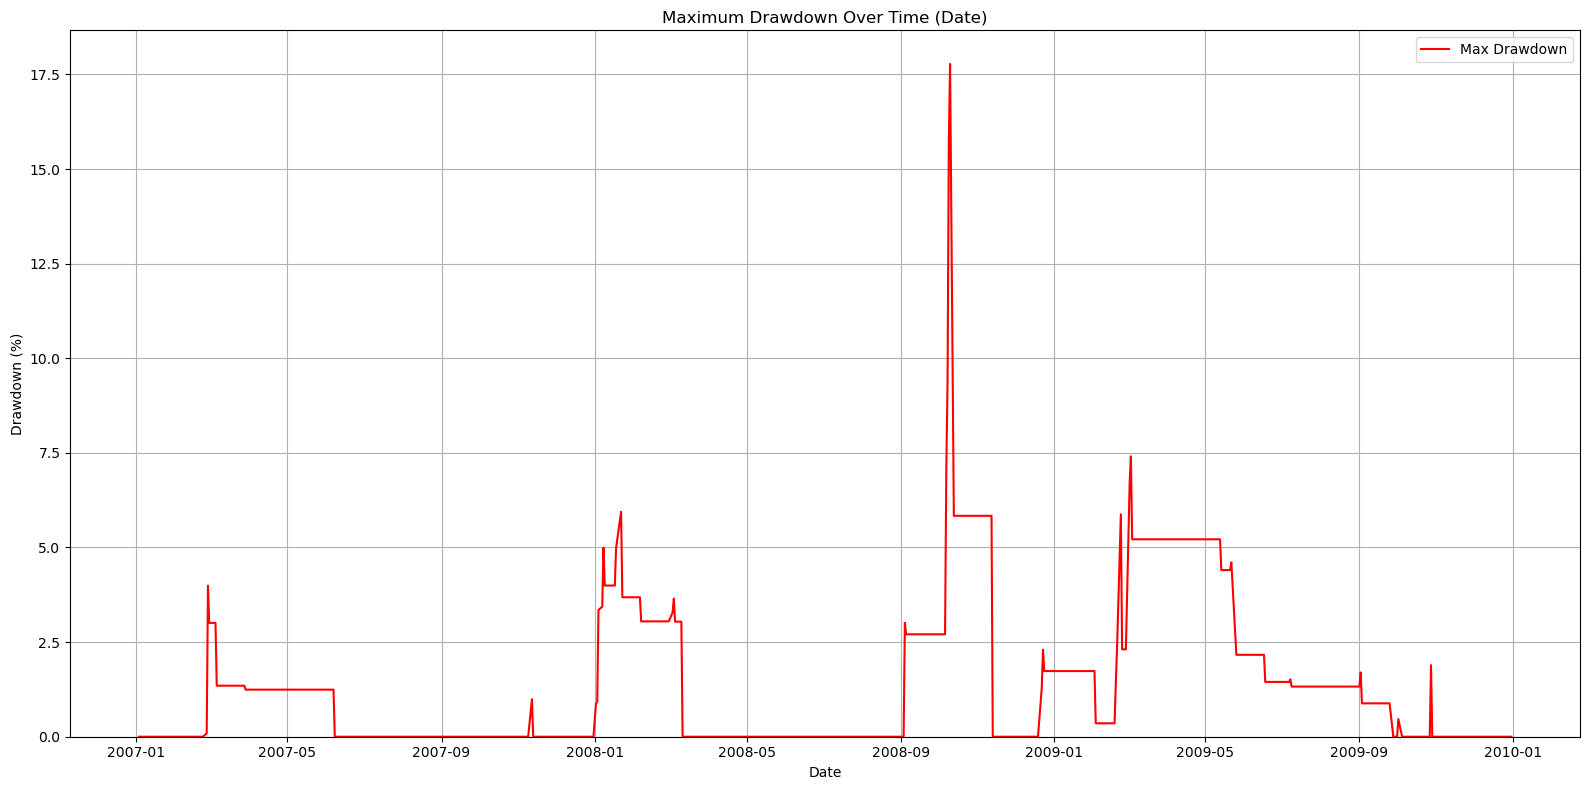

NameError: name 'draw_down' is not defined

In [66]:
def simulate_strategy_with_dates(cash, stock_data, num_of_states):
    
    start = cash
    date_record = [stock_data.index[0]]  # Initialize the list of dates with the start date
    equity_record = [cash]  # To store the cash trajectory
    max_cash = cash  # Track the highest value of cash for max drawdown calculation
    drawdowns = [0]  # To store the drawdowns

    state_to_col = {2: '2_States', 4: '4_States', 8: '8_States', 16: '16_States', 32: '32_States'}

    # Retrieve the appropriate column name based on num_of_states
    if num_of_states not in state_to_col:
        raise ValueError(f"Invalid num_of_states: {num_of_states}. Must be one of {list(state_to_col.keys())}")

    state_column = state_to_col[num_of_states]

    # Iterate through the DataFrame and execute strategy
    for index in range(len(stock_data) - 1):  # Avoid out-of-bounds on the last row
        # Access current and next day's price and pct_change
        current_row = stock_data.iloc[index]
        next_row = stock_data.iloc[index + 1]
        state = current_row[state_column]

        if state == 'D'*int((math.log2(num_of_states))):
            # Calculate the amount gained or lost on the next day
            pct_change = next_row['Pct_Change']
            cash += cash * pct_change  # Cash change is based on pct_change of the next day

        # Update the cash value and date
        equity_record.append(cash)
        date_record.append(next_row.name)  # Append the next date

        # Track max drawdown (the difference between max_cash and current cash)
        max_cash = max(max_cash, cash)
        drawdowns.append((max_cash - cash) / max_cash * 100)

    plot_results_against_date(equity_record, drawdowns, date_record, start)

    return date_record, equity_record, draw_down

def plot_results_against_date(equity_record, drawdowns, date_record, start):

    plt.figure(figsize=(16, 8))

    for i in range(len(equity_record) - 1):
        # Determine the color of the segment
        color = 'green' if equity_record[i+1] >= start else 'red'
        plt.plot(date_record[i:i+2], equity_record[i:i+2], color=color, linewidth=2)

    plt.title('Overview of Performance')
    plt.xlabel('Date')
    plt.ylabel('Equity ($)')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Max Drawdown plot
    plt.figure(figsize=(16, 8))
    plt.plot(date_record[:len(drawdowns)], drawdowns, label='Max Drawdown', color='red')  # Fix: plot against dates
    plt.title('Maximum Drawdown Over Time (Date)')
    plt.xlabel('Date')
    plt.ylabel('Drawdown (%)')
    plt.legend()
    plt.ylim(bottom=0)
    plt.grid(True)

    plt.tight_layout()
    plt.show()



# Example usage
cash = 10000
num_of_states = 8
ticker_symbol = "SPY"
start_date = "2007-01-01"
end_date = "2010-01-01"
stock_data = download_stock_data(ticker_symbol, start_date, end_date)
date_record, equity_record, draw_down = simulate_strategy_with_dates(cash, stock_data, num_of_states)

print(f"Final Cash: ${equity_record[-1]:,.2f}")


### Significance of the `simulate_strategy_across_multiple_states` Function

This function is designed to simulate and compare the performance of a stock trading strategy under different state configurations (2, 4, 8, and 16 states). Each state represents a different market condition, determined by the underlying stock data's percentage change (`Pct_Change`). By iterating through these different state configurations, the function calculates the cash trajectory over time and visualizes how the trading strategy performs under varying assumptions about market behavior.

#### **Key Concepts and Insights**:
1. **State-Based Strategy Simulation**: The function maps the stock data to different market states. These states are crucial as they represent specific market conditions that influence the strategy's decision-making (e.g., buying or selling based on the "down" state in the model).
   
2. **Visual Comparison**: The function compares multiple state configurations on the same plot, providing a clear visual representation of how the cash balance evolves under different assumptions. This is particularly valuable for evaluating the effectiveness of trading strategies in diverse market environments.

3. **Trade Execution Based on State**: The strategy is based on a state condition, where the trade is executed if the state is defined as a "down" market, according to the specified state configuration (e.g., 'D'*2 for 2 states). This makes the function applicable for testing trading models that react to specific market states or signals.

4. **Multiple Scenarios**: By simulating across multiple state configurations, this function allows users to assess how different market models (e.g., 2-state vs. 16-state models) impact the strategy's performance, highlighting potential risks and rewards in various scenarios.

5. **Flexible Analysis**: The function allows users to dynamically choose which state models (2, 4, 8, or 16) they want to simulate, providing flexibility in strategy analysis. This can help in understanding how finer granularities (more states) may lead to different cash balance trajectories.

6. **Practical Insights**: For quantitative analysts or traders, understanding the relationship between the number of states (representing complexity or market granularity) and the resulting trading performance is crucial for making informed decisions about model complexity versus returns.

Downloaded $SPY, starting from 2000-01-03 to 2024-12-31
start: [10000]
start: [10000]
start: [10000]
start: [10000]
start: [10000]


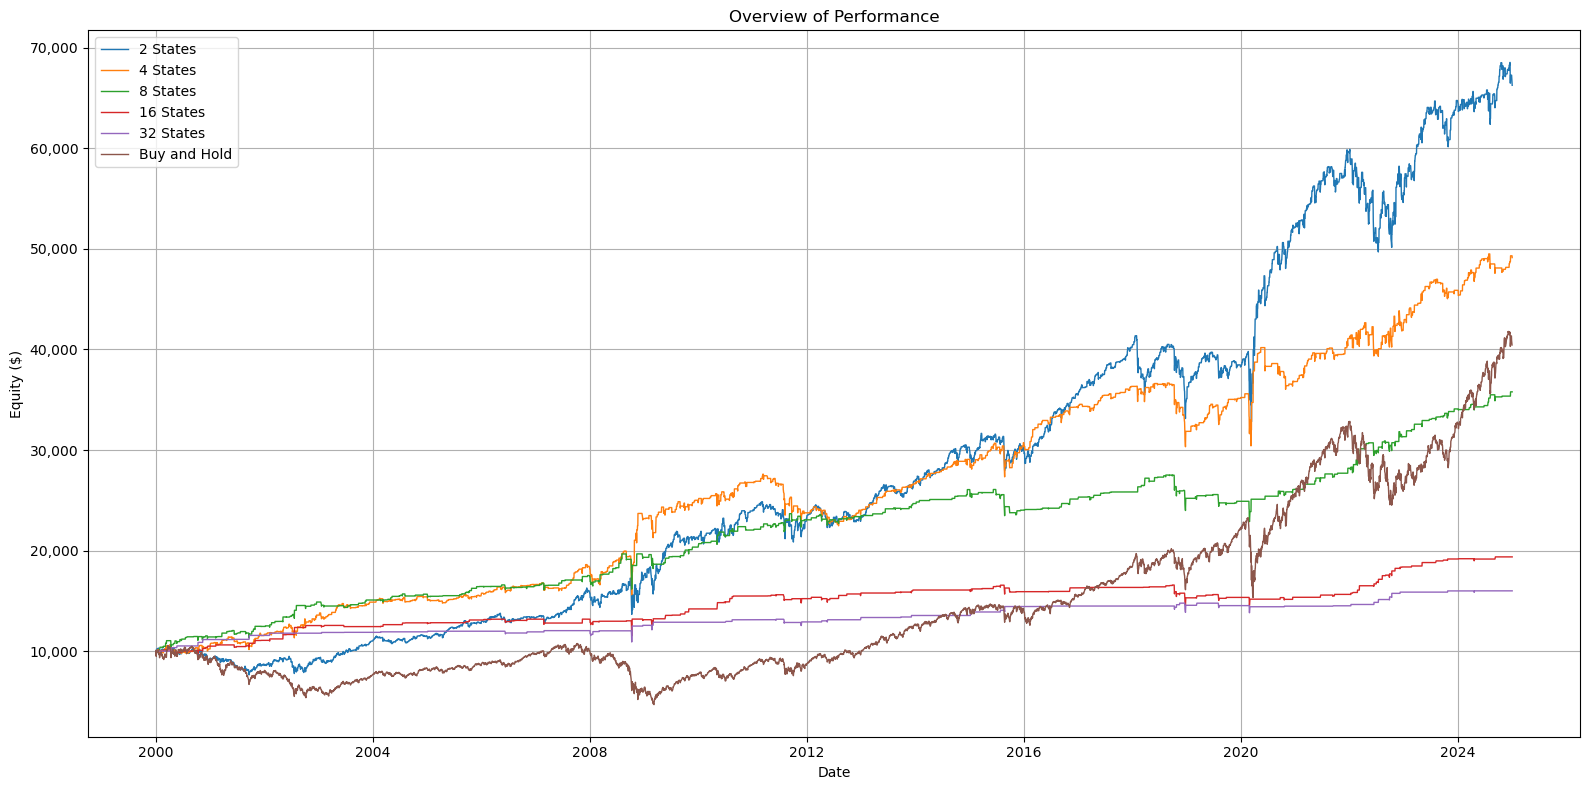

In [65]:
def simulate_strategy_across_multiple_states(cash, stock_data, states_list):

    start = cash
    state_to_col = {2: '2_States', 4: '4_States', 8: '8_States', 16: '16_States', 32: '32_States'}
    
    # Validate states_list
    for num_of_states in states_list:
        if num_of_states not in state_to_col:
            raise ValueError(f"Invalid num_of_states: {num_of_states}. Must be one of {list(state_to_col.keys())}")

    # Plotting setup
    plt.figure(figsize=(16, 8))

    
    # Iterate through all state simulations
    for num_of_states in states_list:
        state_column = state_to_col[num_of_states]

        equity_record = [start]  # Cash trajectory
        print("start:", equity_record)

        date_record = [stock_data.index[0]]  # Date trajectory
        cash = start
        for index in range(len(stock_data) - 1):  # Avoid out-of-bounds
            current_row = stock_data.iloc[index]
            next_row = stock_data.iloc[index + 1]
            state = current_row[state_column]


            # Perform a trade if the state condition is met
            if state == 'D' * int((math.log2(num_of_states))):
                pct_change = next_row['Pct_Change']
                cash += cash * pct_change  # Update cash based on percentage change

            # Append daily cash value and date, regardless of trades
            equity_record.append(cash)
            date_record.append(next_row.name)



        # Plotting results for the current number of states
        plt.plot(date_record, equity_record, label=f"{num_of_states} States", linewidth=1)

    first_price = stock_data.iloc[0]['Close']
    equity_record = [start]  # Cash trajectory
    date_record = [stock_data.index[0]]  # Date trajectory
    for index in range(len(stock_data) - 1):
        # Track buy and hold as well
        current_date = stock_data.iloc[index].name
        current_price = stock_data.iloc[index]['Close']
        current_value = start * current_price / first_price
        equity_record.append(current_value)
        date_record.append(current_date)

        
    plt.plot(date_record, equity_record, label=f"Buy and Hold", linewidth=1)



    # Add labels and legend
    plt.title('Overview of Performance')
    plt.xlabel('Date')
    plt.ylabel('Equity ($)')
    plt.legend()
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Example usage
cash = 10000
states_list = [2, 4, 8, 16, 32]
ticker_symbol = "SPY"
start_date = "2000-01-01"
end_date = "2025-01-01"
stock_data = download_stock_data(ticker_symbol, start_date, end_date)

simulate_strategy_across_multiple_states(cash, stock_data, states_list)

Downloaded $SPY, starting from 2015-01-02 to 2024-12-31
Downloaded $SPY, starting from 2015-01-02 to 2024-12-31


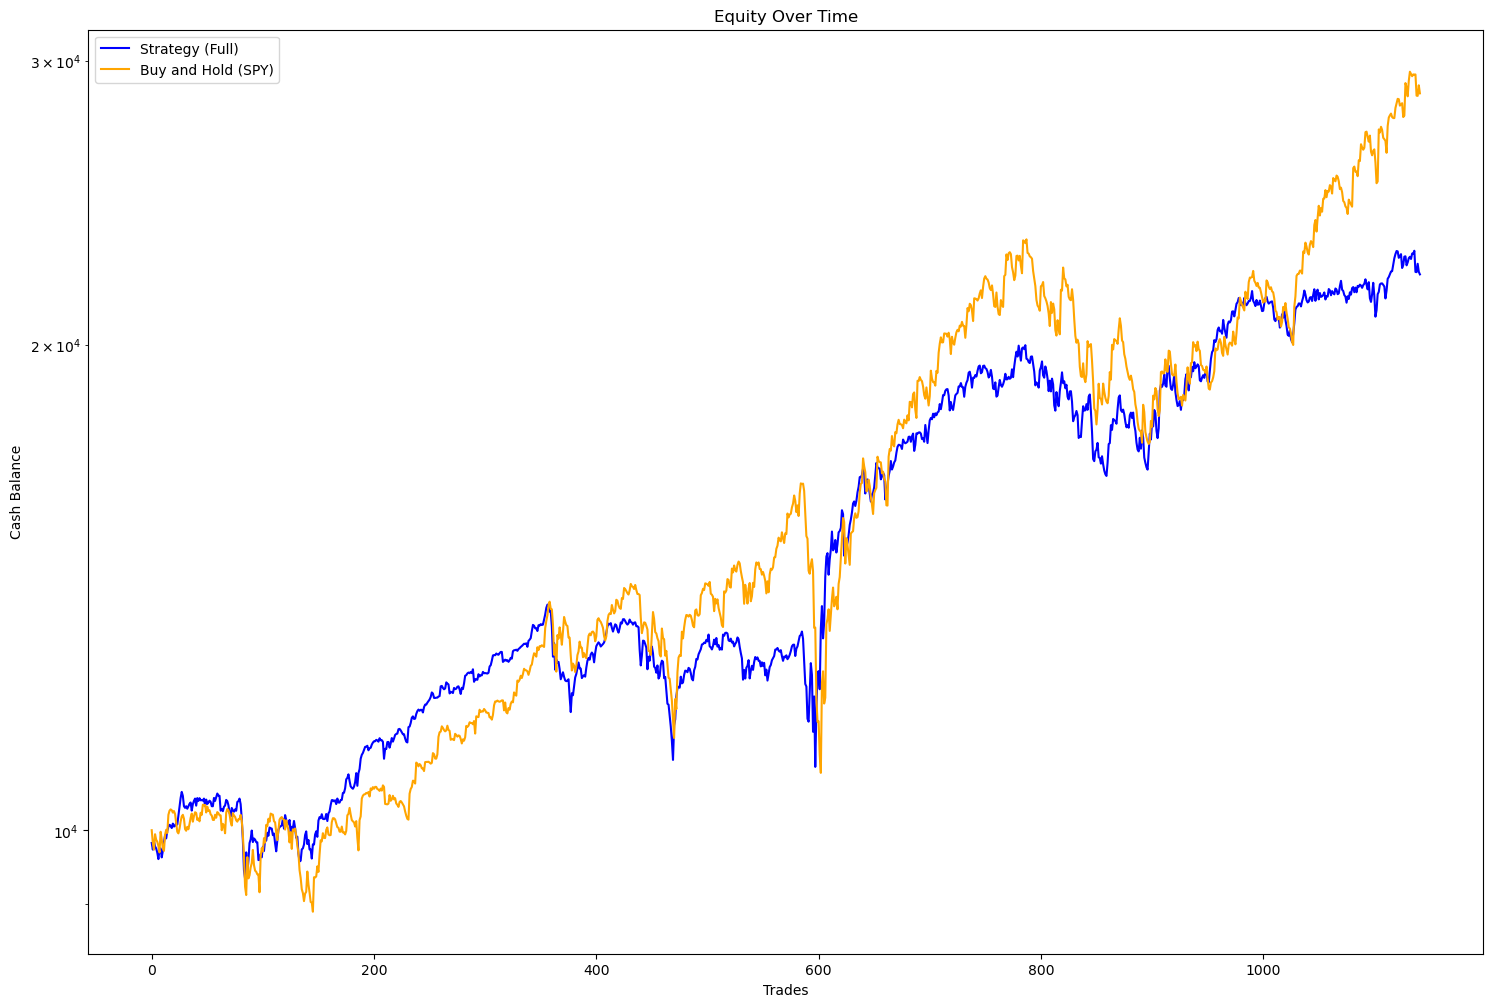

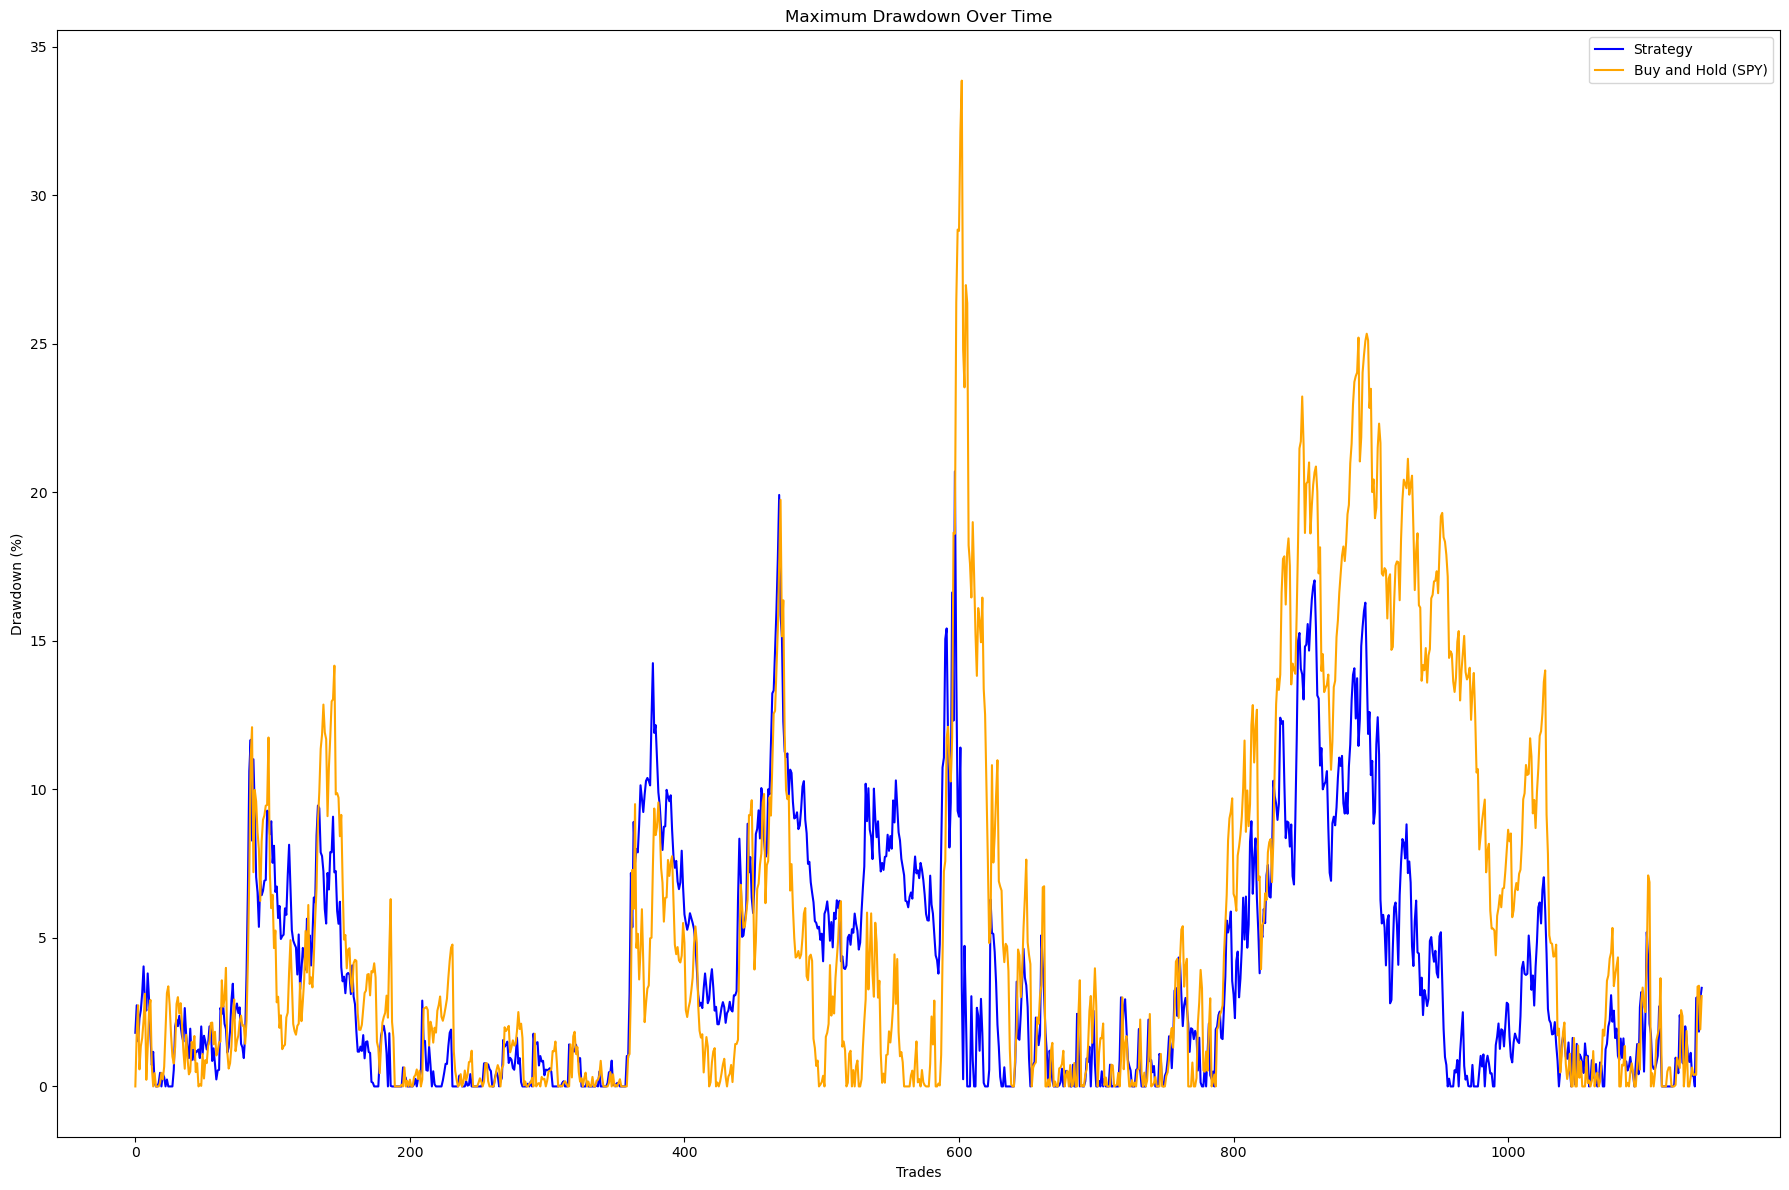

Net Profit: 12,292.51 USD
Total Closed Trades: 1142


In [45]:
def strategy(cash, goal, datas):
    simulations = []  # To store the cash trajectory
    trade_count = 0  # Track the number of trades
    max_cash = cash  # Track the highest value of cash for max drawdown calculation
    drawdowns = []  # To store the drawdowns

    cash_2 = cash
    simulations_2 = []  # To store the cash trajectory
    max_cash_2 = cash_2  # Track the highest value of cash for max drawdown calculation
    drawdowns_2 = []  # To store the drawdowns

    cash_3 = cash
    simulations_3 = []  # To store the cash trajectory
    max_cash_3 = cash_3  # Track the highest value of cash for max drawdown calculation
    drawdowns_3 = []  # To store the drawdowns

    cash_4 = cash
    simulations_4 = []  # To store the cash trajectory
    max_cash_4 = cash_4  # Track the highest value of cash for max drawdown calculation
    drawdowns_4 = []  # To store the drawdowns

    cash_bm = cash
    simulations_bm = []  # To store the cash trajectory
    max_cash_bm = cash  # Track the highest value of cash for max drawdown calculation
    drawdowns_bm = []  # To store the drawdowns
    
    
    for index in range(max(len(data) for data in datas) - 1):
        for data in datas[1:]:
            # Skip if the current index exceeds the length of the current DataFrame
            if index >= len(data) - 1:
                continue
                
            current_row = data.iloc[index]
            next_row = data.iloc[index + 1]
            
            state = current_row['2_States']
            pct_change = next_row['Pct_Change']
    
            # Check if the state is 'DDD' (down-down-down pattern)
            if state == 'D':
                # Calculate the amount gained or lost on the next day
                cash += cash * pct_change  # Cash change is based on pct_change of the next day

                trade_count += 1
                
                # Update the cash value
                simulations.append(cash)


                # Track max drawdown (the difference between max_cash and current cash)
                max_cash = max(max_cash, cash)
                drawdown = ((max_cash - cash) / max_cash) * 100
                drawdowns.append(drawdown)

                current_price_bm = datas[0].iloc[index]['Close']
                initial_price_bm = datas[0].iloc[0]["Close"]
                current_value_bm = cash_bm * current_price_bm / initial_price_bm
                simulations_bm.append(current_value_bm)
                max_cash_bm = max(max_cash_bm, current_value_bm)
                drawdown_bm = ((max_cash_bm - current_value_bm) / max_cash_bm) * 100
                drawdowns_bm.append(drawdown_bm)

                break
    
    # Plotting the results
    plt.figure(figsize=(18, 12))

    # Cash trajectory plot
    plt.plot(simulations, label='Strategy (Full)', color='blue')
    plt.plot(simulations_bm, label='Buy and Hold (SPY)', color='orange')
    plt.yscale('log')  # Set y-axis to log scale
    plt.title('Equity Over Time')
    plt.xlabel('Trades')
    plt.ylabel('Cash Balance')
    plt.legend()

    # Max Drawdown plot
    plt.figure(figsize=(18, 12))
    plt.plot(drawdowns, label='Strategy', color='blue')
    plt.plot(drawdowns_bm, label='Buy and Hold (SPY)', color='orange')
    plt.title('Maximum Drawdown Over Time')
    plt.xlabel('Trades')
    plt.ylabel('Drawdown (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return simulations, trade_count

cash = 10000
goal = cash * 2
start_date = "2015-01-01"
end_date = "2025-01-01"
ticker_symbols = [ "SPY", "SPY"]
datas = []

# Iterate over the ticker symbols and fetch the data
for ticker_symbol in ticker_symbols:
    data = download_stock_data(ticker_symbol, start_date, end_date)
    datas.append(data)


simulations, trade_count = strategy(cash, goal, datas)

# print(f"Final Cash: {simulations[-1]} USD")
print(f"Net Profit: {simulations[-1] - simulations[0]:,.2f} USD")
print(f"Total Closed Trades: {trade_count}")

Downloaded $SPY, starting from 2015-01-02 to 2024-12-31


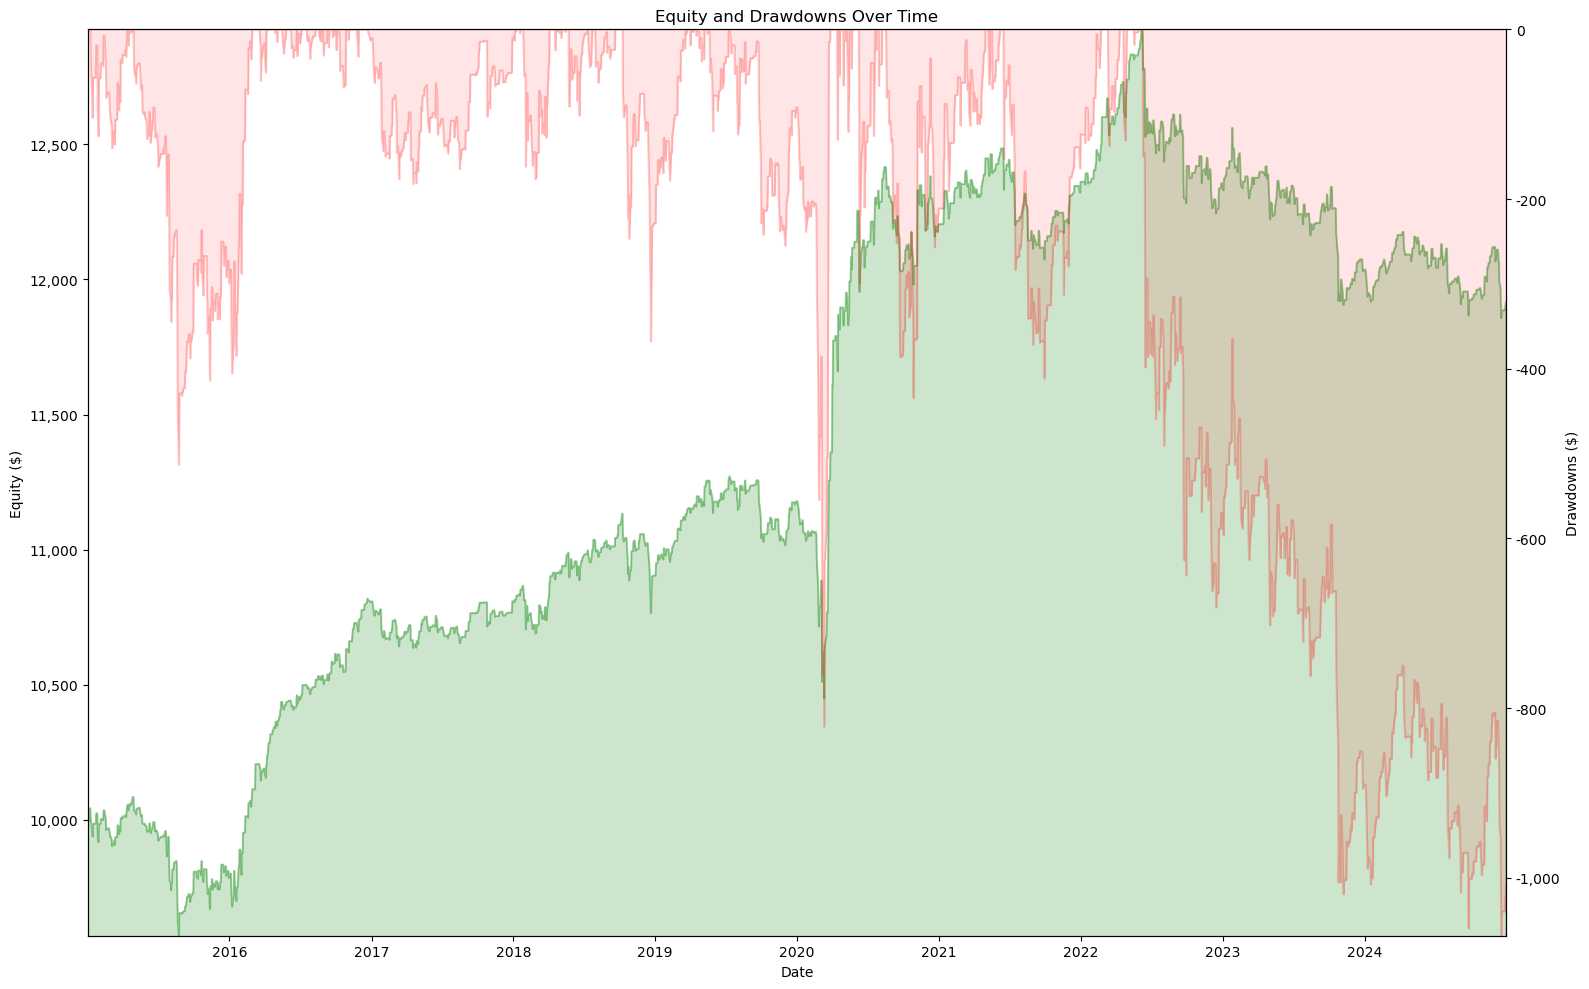

In [402]:
def buy_and_hold(cash, stock_data):

    date_record = []
    equity_record = []
    max_equity = cash  # Track the highest value of equity for max drawdown calculation
    drawdowns_record = []  # To store the drawdowns

    buy_price = data.iloc[0]['Close']
    
    for index in range(len(data)- 1):
        # Skip if the current index exceeds the length of the current DataFrame
        if index >= len(data) - 1:
            continue

        current_date = data.index[index]
        current_price = data.iloc[index]['Close']
        current_value = cash * current_price / buy_price
        max_equity = max(max_equity, current_value)
        drawdown = current_value - max_equity

        date_record.append(current_date)
        equity_record.append(current_value)
        drawdowns_record.append(drawdown)

    return date_record, equity_record, drawdowns_record

cash = 10000
start_date = "2015-01-01"
end_date = "2025-01-01"
stock_data = download_stock_data("SPY", start_date, end_date)

date_record_bm, equity_record_bm, drawdowns_record_bm = buy_and_hold(cash,stock_data)
plot_equity_and_drawdowns(date_record, equity_record, drawdowns_record)

In [403]:
def strategy(cash, stock_data, entry_signal, kelly_criteria):    

    date_record = []
    equity_record = []  # To store the cash trajectory
    max_equity = cash  # Track the highest value of cash for max drawdown calculation
    drawdowns_record = []  # To store the drawdowns

    for index in range(len(data) - 1):
        # Skip if the current index exceeds the length of the current DataFrame
        if index >= len(data) - 1:
            continue
            
        current_row = data.iloc[index]
        next_row = data.iloc[index + 1]

        current_date = data.index[index]
        state_2 = current_row['2_States']
        state_4 = current_row['4_States']
        state_8 = current_row['8_States']
        state_16 = current_row['16_States']
        pct_change = next_row['Pct_Change']
        
        if entry_signal in [state_2, state_4, state_8, state_16]:
            cash += cash * pct_change * kelly_criteria
        
        max_equity = max(max_equity, cash)
        drawdown = cash - max_equity
        date_record.append(current_date)
        equity_record.append(cash)
        drawdowns_record.append(drawdown)

    return date_record, equity_record, drawdowns_record

entry_signal = 'D'
date_record, equity_record, drawdowns_record = strategy(cash, stock_data, entry_signal, 0.2)

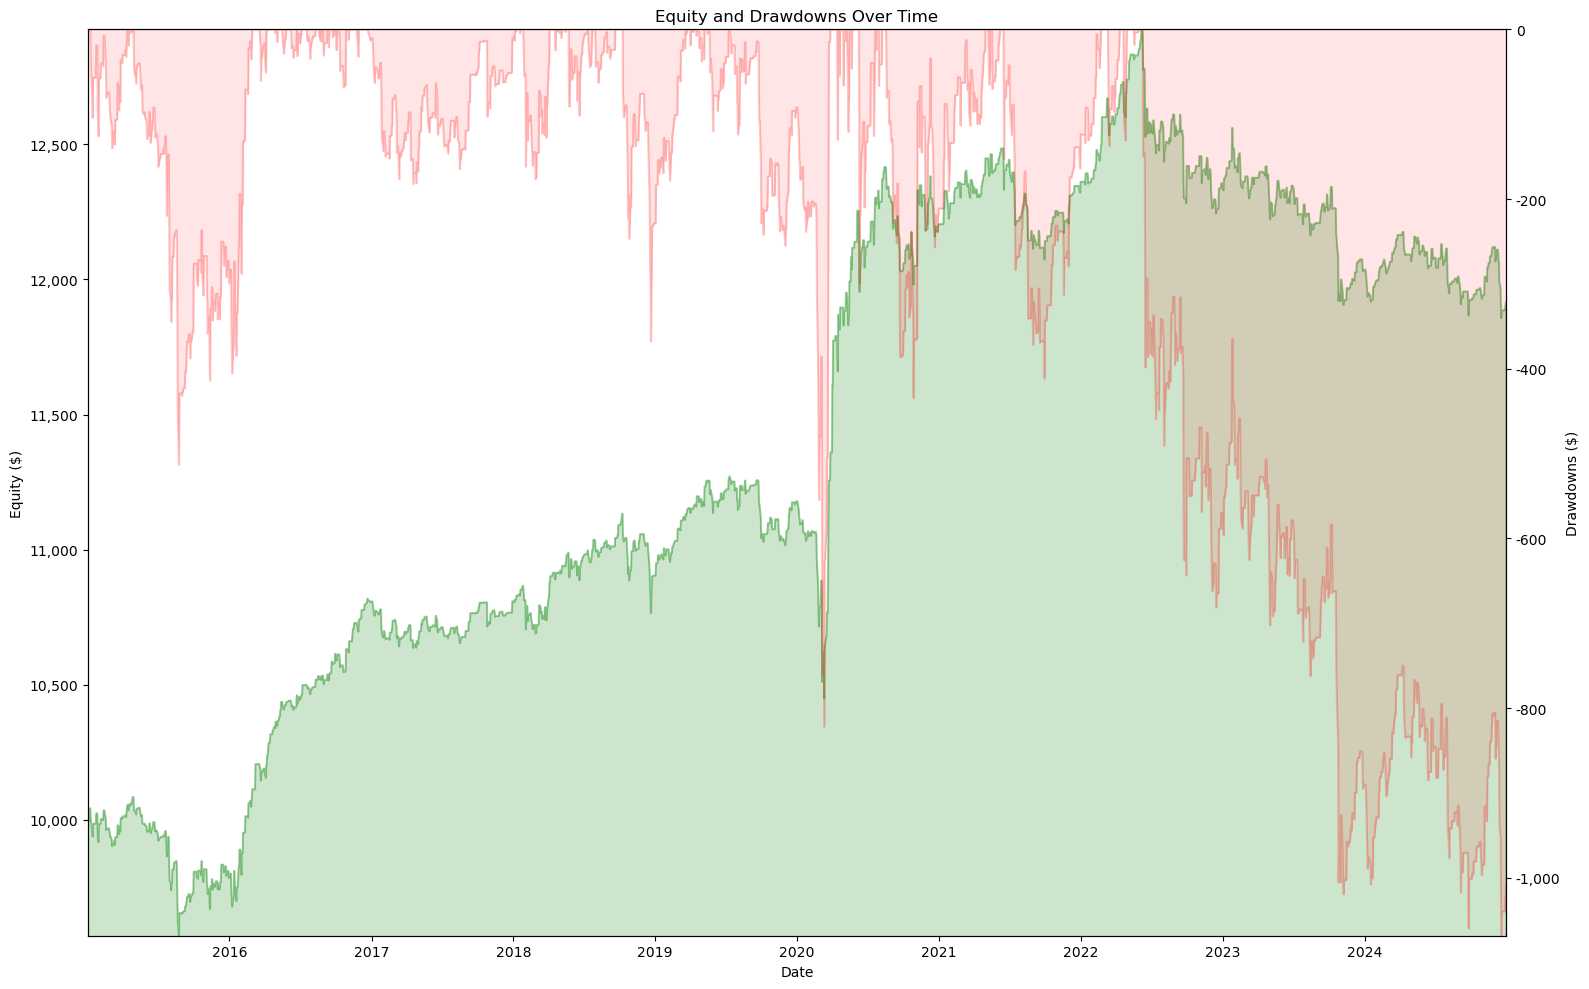

In [404]:
def plot_equity_and_drawdowns(date_record, equity_record, drawdowns_record, title="Equity and Drawdowns Over Time"):

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(16, 10))

    # Plot equity_record on the left y-axis
    ax1.plot(date_record, equity_record, color='green', label='Equity Record', alpha=0.3)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Equity ($)')
    ax1.fill_between(date_record, equity_record, color='green', alpha=0.2)

    # Set x-axis and y-axis limits to match the data range
    ax1.set_xlim([min(date_record), max(date_record)])  # Ensure x-axis matches the date range
    ax1.set_ylim([min(equity_record), max(equity_record)])  # Ensure y-axis matches the equity range
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))  # Format left y-axis

    # Create a second y-axis (for drawdowns) on the right side
    ax2 = ax1.twinx()

    # Plot drawdowns as positive bars on the right y-axis
    ax2.plot(date_record, drawdowns_record, color='red', label='Drawdowns Record', alpha=0.2)
    ax2.set_ylabel('Drawdowns ($)')
    ax2.fill_between(date_record, drawdowns_record, color='red', alpha=0.1)
    ax2.set_ylim([min(drawdowns_record), max(drawdowns_record)])  # Ensure y-axis matches the drawdown range
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))  # Format right y-axis

    # Add title
    plt.title(title)

    # Display the plot
    fig.tight_layout()  # Make sure everything fits without overlapping
    plt.show()

plot_equity_and_drawdowns(date_record, equity_record, drawdowns_record)

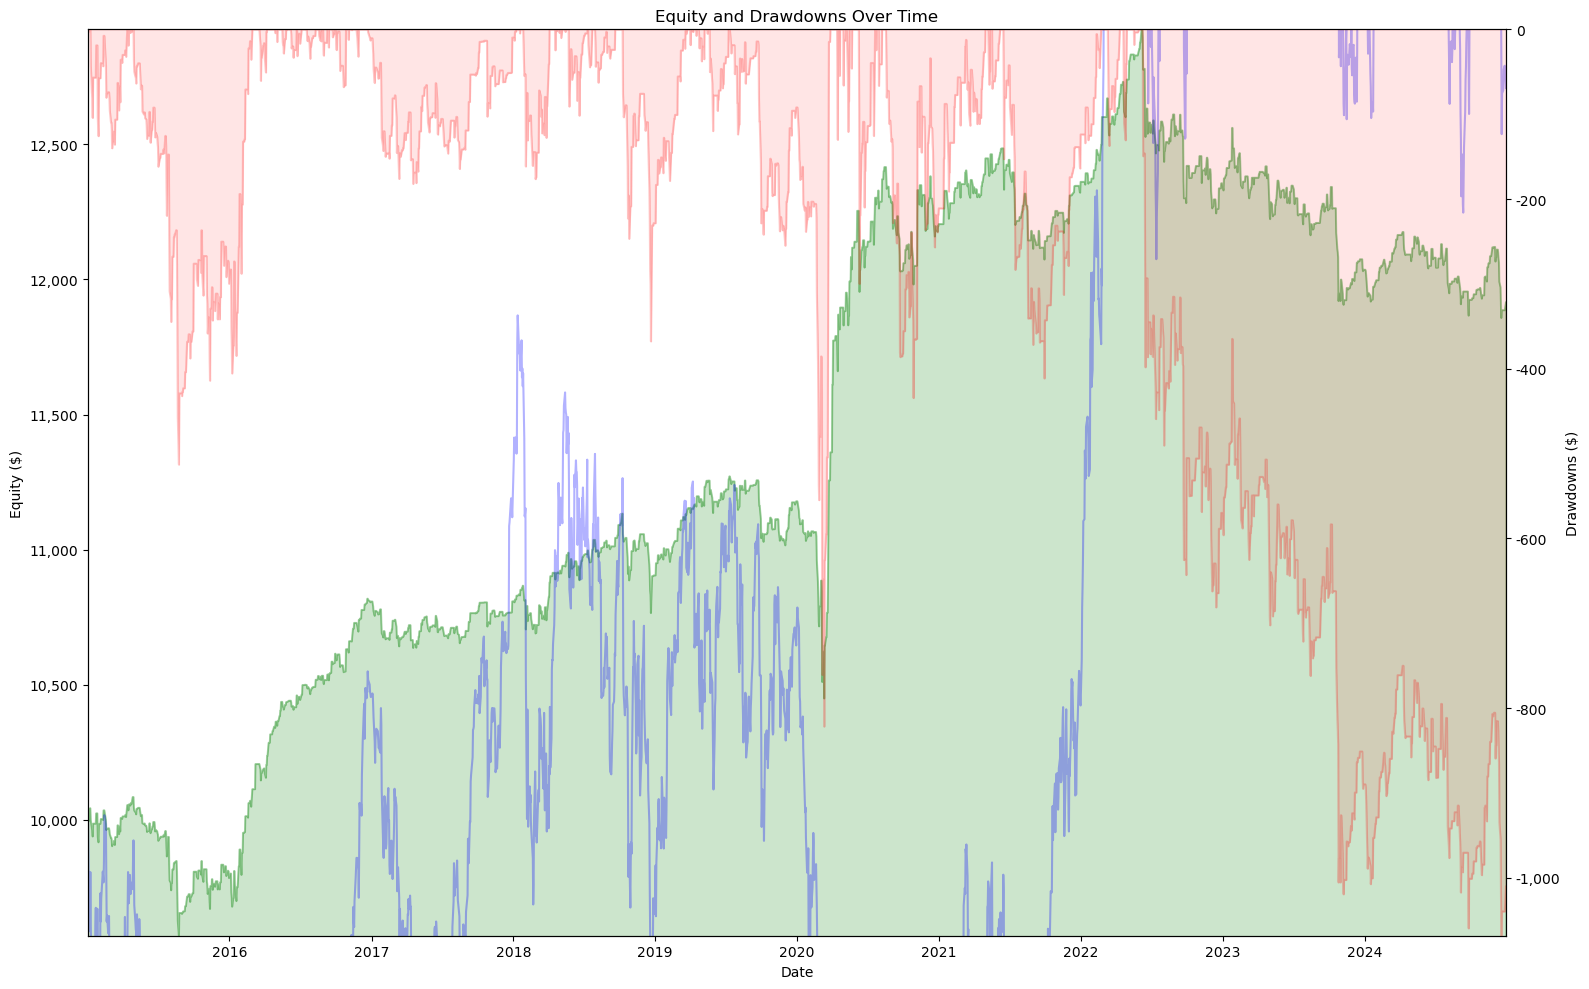

In [409]:
def plot_equity_and_drawdowns_with_benchmark(date_record, equity_record, drawdowns_record, date_record_bm, equity_record_bm, drawdowns_record_bm, title="Equity and Drawdowns Over Time"):

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(16, 10))

    # Plot equity_record on the left y-axis
    ax1.plot(date_record, equity_record, color='green', label='Equity Record', alpha=0.3)
    ax1.plot(date_record_bm, equity_record_bm, color='blue', label='Buy and Hold', alpha=0.3)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Equity ($)')
    ax1.fill_between(date_record, equity_record, color='green', alpha=0.2)

    # Set x-axis and y-axis limits to match the data range
    ax1.set_xlim([min(date_record), max(date_record)])  # Ensure x-axis matches the date range
    ax1.set_ylim([min(equity_record), max(equity_record)])  # Ensure y-axis matches the equity range
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))  # Format left y-axis

    # Create a second y-axis (for drawdowns) on the right side
    ax2 = ax1.twinx()

    # Plot drawdowns as positive bars on the right y-axis
    ax2.plot(date_record, drawdowns_record, color='red', label='Drawdowns Record', alpha=0.2)
    ax2.set_ylabel('Drawdowns ($)')
    ax2.fill_between(date_record, drawdowns_record, color='red', alpha=0.1)
    ax2.set_ylim([min(drawdowns_record), max(drawdowns_record)])  # Ensure y-axis matches the drawdown range
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))  # Format right y-axis

    # Add title
    plt.title(title)

    # Display the plot
    fig.tight_layout()  # Make sure everything fits without overlapping
    plt.show()

plot_equity_and_drawdowns_with_benchmark(date_record, equity_record, drawdowns_record, date_record_bm, equity_record_bm, drawdowns_record_bm)

Downloaded $SPY, starting from 2000-01-03 to 2024-12-31
Downloaded $SPY, starting from 2000-01-03 to 2024-12-31
2041.472173949993


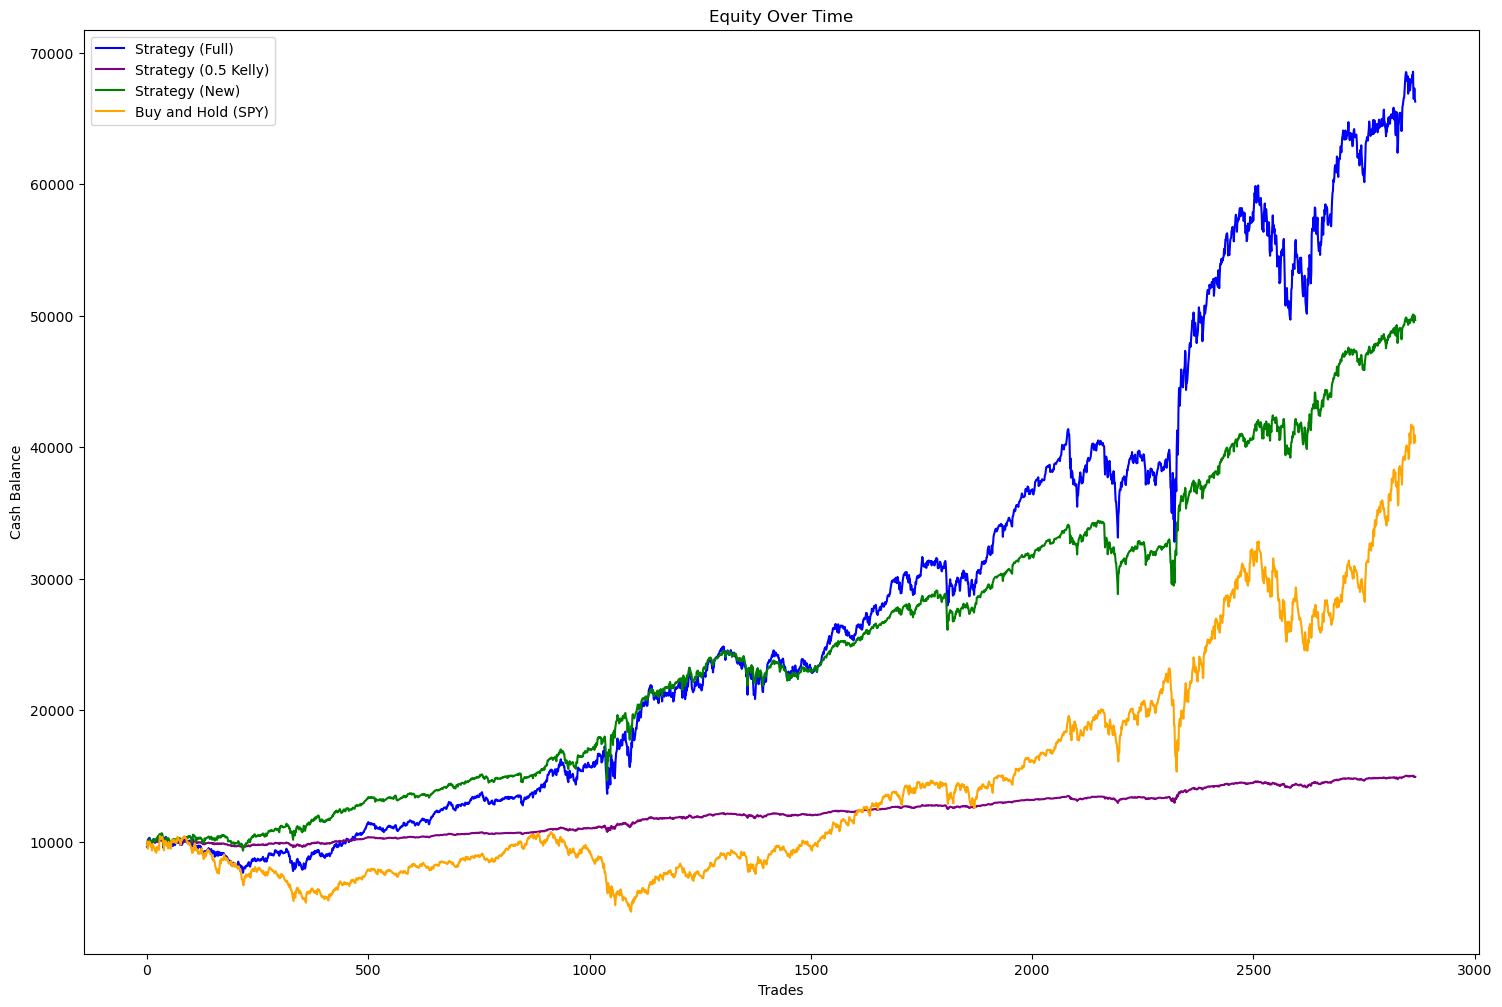

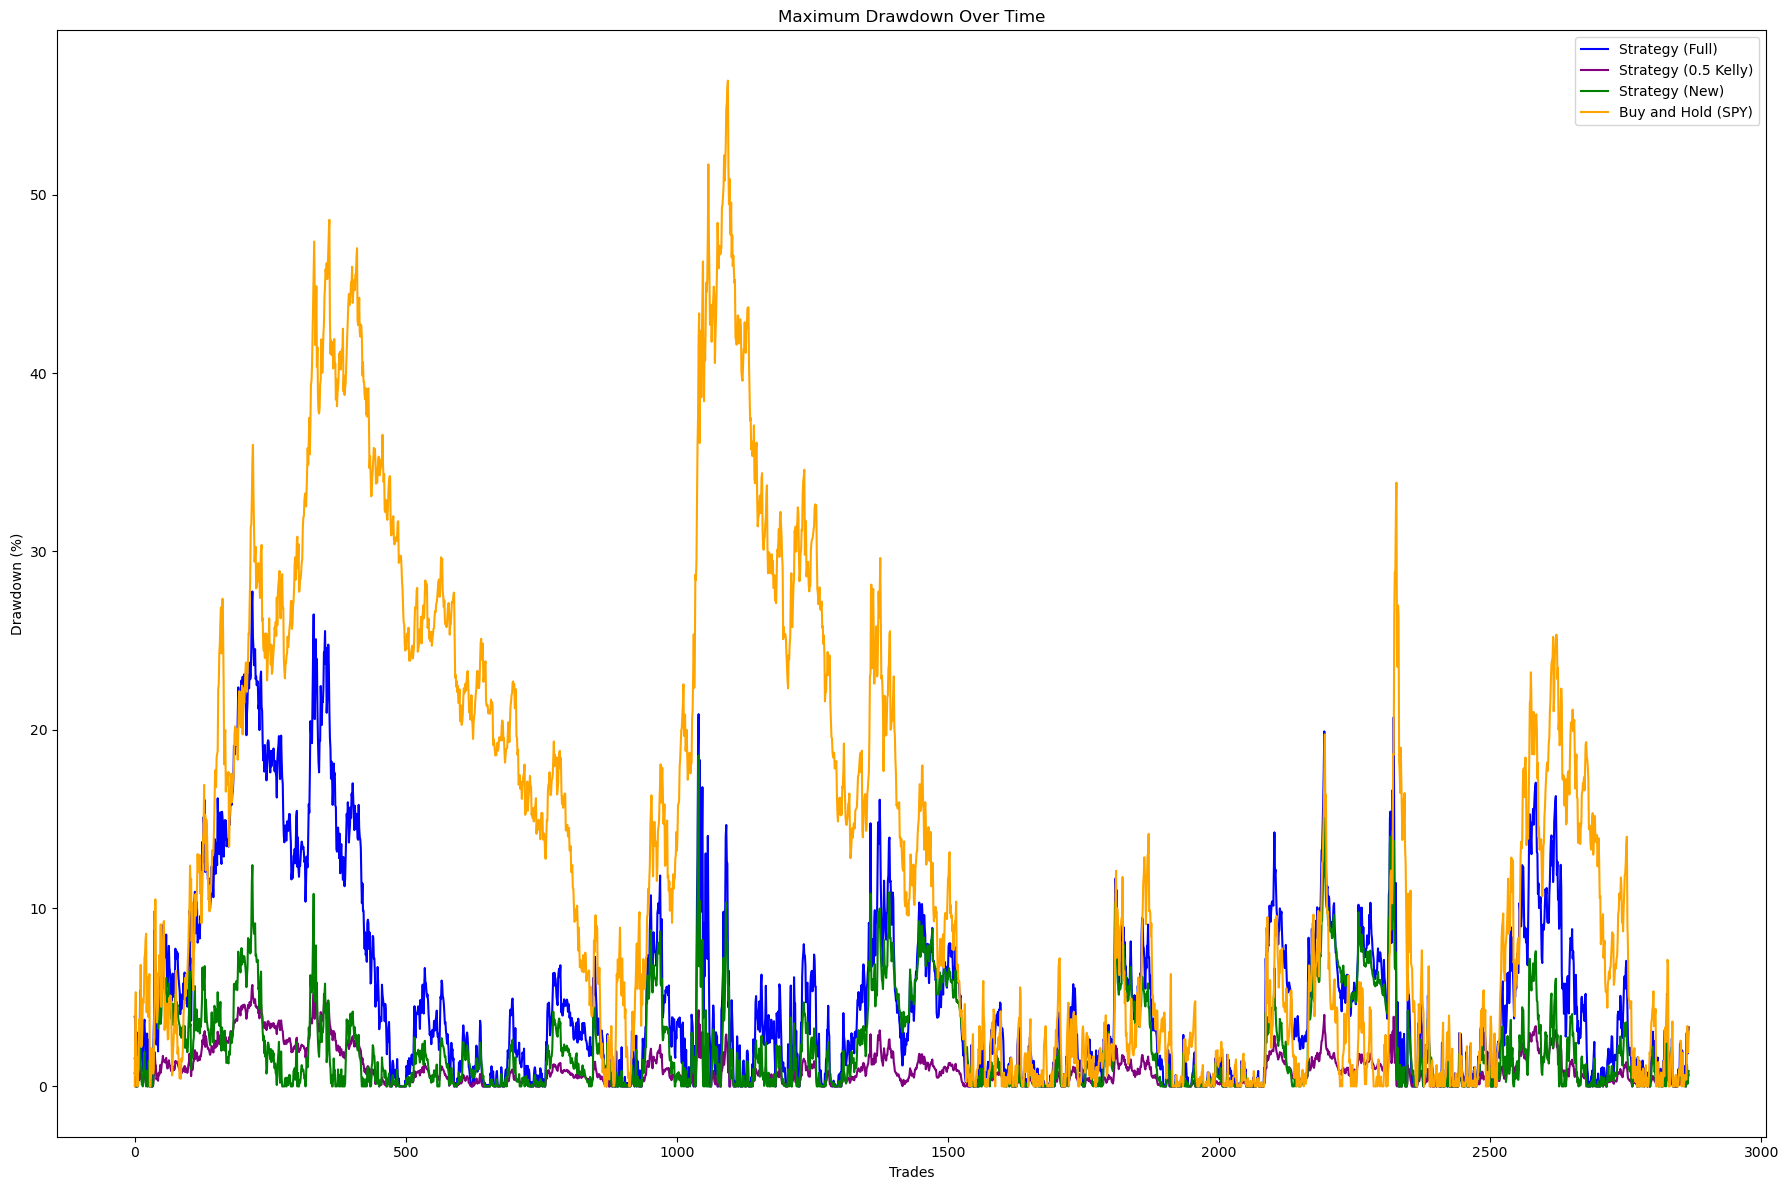

Net Profit: 56,659.26 USD
Total Closed Trades: 2867


In [426]:
def strategy(cash, goal, datas):
    simulations = []  # To store the cash trajectory
    trade_count = 0  # Track the number of trades
    max_cash = cash  # Track the highest value of cash for max drawdown calculation
    drawdowns = []  # To store the drawdowns

    cash_2 = cash
    simulations_2 = []  # To store the cash trajectory
    max_cash_2 = cash_2  # Track the highest value of cash for max drawdown calculation
    drawdowns_2 = []  # To store the drawdowns

    cash_3 = cash
    simulations_3 = []  # To store the cash trajectory
    max_cash_3 = cash_3  # Track the highest value of cash for max drawdown calculation
    drawdowns_3 = []  # To store the drawdowns

    cash_bm = cash
    simulations_bm = []  # To store the cash trajectory
    max_cash_bm = cash  # Track the highest value of cash for max drawdown calculation
    drawdowns_bm = []  # To store the drawdowns
    
    
    for index in range(max(len(data) for data in datas) - 1):
        for data in datas[1:]:
            # Skip if the current index exceeds the length of the current DataFrame
            if index >= len(data) - 1:
                continue
                
            current_row = data.iloc[index]
            next_row = data.iloc[index + 1]
            
            states_16 = current_row['16_States']
            states_8 = current_row['8_States']
            states_4 = current_row['4_States']
            states_2 = current_row['2_States']
            pct_change = next_row['Pct_Change']
    
            if states_16 == 'DDDD':
                cash_3 += cash_3 * pct_change * 1.0
            elif states_8 == 'DDD':
                cash_3 += cash_3  * pct_change * 0.9
            elif states_4 == 'DD':
                cash_3 += cash_3 * pct_change  * 0.7
            elif states_2 == 'D':
                cash_3 += cash_3 * pct_change * 0.4
            else: 
                pass

            if states_2 == 'D':
                # Calculate the amount gained or lost on the next day
                cash += cash * pct_change  # Cash change is based on pct_change of the next day
                cash_2 += cash_2 * (1 * kelly) * pct_change
                trade_count += 1
                
                # Update the cash value
                simulations.append(cash)
                simulations_2.append(cash_2)
                simulations_3.append(cash_3)


                # Track max drawdown (the difference between max_cash and current cash)
                max_cash = max(max_cash, cash)
                drawdown = ((max_cash - cash) / max_cash) * 100
                drawdowns.append(drawdown)
                max_cash_2 = max(max_cash_2, cash_2)
                drawdown_2 = ((max_cash_2 - cash_2) / max_cash_2) * 100
                drawdowns_2.append(drawdown_2)

                max_cash_3 = max(max_cash_3, cash_3)
                drawdown_3 = ((max_cash_3 - cash_3) / max_cash_3) * 100
                drawdowns_3.append(drawdown_3)


                current_price_bm = datas[0].iloc[index]['Close']
                initial_price_bm = datas[0].iloc[0]["Close"]
                current_value_bm = cash_bm * current_price_bm / initial_price_bm
                simulations_bm.append(current_value_bm)
                max_cash_bm = max(max_cash_bm, current_value_bm)
                drawdown_bm = ((max_cash_bm - current_value_bm) / max_cash_bm) * 100
                drawdowns_bm.append(drawdown_bm)

                break

    max_drawdown = max(drawdowns)
    total_return = simulations[-1] - simulations[0]
    risk_adjusted_return_over_drawdown = total_return / max_drawdown
    print(risk_adjusted_return_over_drawdown)
    
    # Plotting the results
    plt.figure(figsize=(18, 12))

    # Cash trajectory plot
    plt.plot(simulations, label='Strategy (Full)', color='blue')
    plt.plot(simulations_2, label='Strategy (0.5 Kelly)', color='purple')
    plt.plot(simulations_3, label='Strategy (New)', color='green')
    plt.plot(simulations_bm, label='Buy and Hold (SPY)', color='orange')
    # plt.yscale('log')  # Set y-axis to log scale
    plt.title('Equity Over Time')
    plt.xlabel('Trades')
    plt.ylabel('Cash Balance')
    plt.legend()

    # Max Drawdown plot
    plt.figure(figsize=(18, 12))
    plt.plot(drawdowns, label='Strategy (Full)', color='blue')
    plt.plot(drawdowns_2, label='Strategy (0.5 Kelly)', color='purple')
    plt.plot(drawdowns_3, label='Strategy (New)', color='green')
    plt.plot(drawdowns_bm, label='Buy and Hold (SPY)', color='orange')
    plt.title('Maximum Drawdown Over Time')
    plt.xlabel('Trades')
    plt.ylabel('Drawdown (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return simulations, trade_count

cash = 10000
goal = cash * 2
start_date = "2000-01-01"
end_date = "2025-01-01"
ticker_symbols = [ "SPY", "AAPL", "NVDA", "GOOG", "AMZN", "AMD", "AVGO", "CRM", "KO", "JPM", "LLY", "UNH", "COST", "XOM", "CVX"]
ticker_symbols = [ "SPY", "SPY"]

datas = []

# Iterate over the ticker symbols and fetch the data
for ticker_symbol in ticker_symbols:
    data = download_stock_data(ticker_symbol, start_date, end_date)
    datas.append(data)


simulations, trade_count = strategy(cash, goal, datas)

# print(f"Final Cash: {simulations[-1]} USD")
print(f"Net Profit: {simulations[-1] - simulations[0]:,.2f} USD")
print(f"Total Closed Trades: {trade_count}")

Downloaded $SPY, starting from 2003-01-02 to 2024-12-31
Downloaded $AAPL, starting from 2003-01-02 to 2024-12-31
Downloaded $NVDA, starting from 2003-01-02 to 2024-12-31
Downloaded $GOOG, starting from 2004-08-24 to 2024-12-31
Downloaded $AMZN, starting from 2003-01-02 to 2024-12-31
Downloaded $AMD, starting from 2003-01-02 to 2024-12-31
Downloaded $AVGO, starting from 2009-08-11 to 2024-12-31
Downloaded $CRM, starting from 2004-06-28 to 2024-12-31
Downloaded $KO, starting from 2003-01-02 to 2024-12-31
Downloaded $JPM, starting from 2003-01-02 to 2024-12-31
Downloaded $LLY, starting from 2003-01-02 to 2024-12-31
Downloaded $UNH, starting from 2003-01-02 to 2024-12-31
Downloaded $COST, starting from 2003-01-02 to 2024-12-31
Downloaded $XOM, starting from 2003-01-02 to 2024-12-31
Downloaded $CVX, starting from 2003-01-02 to 2024-12-31


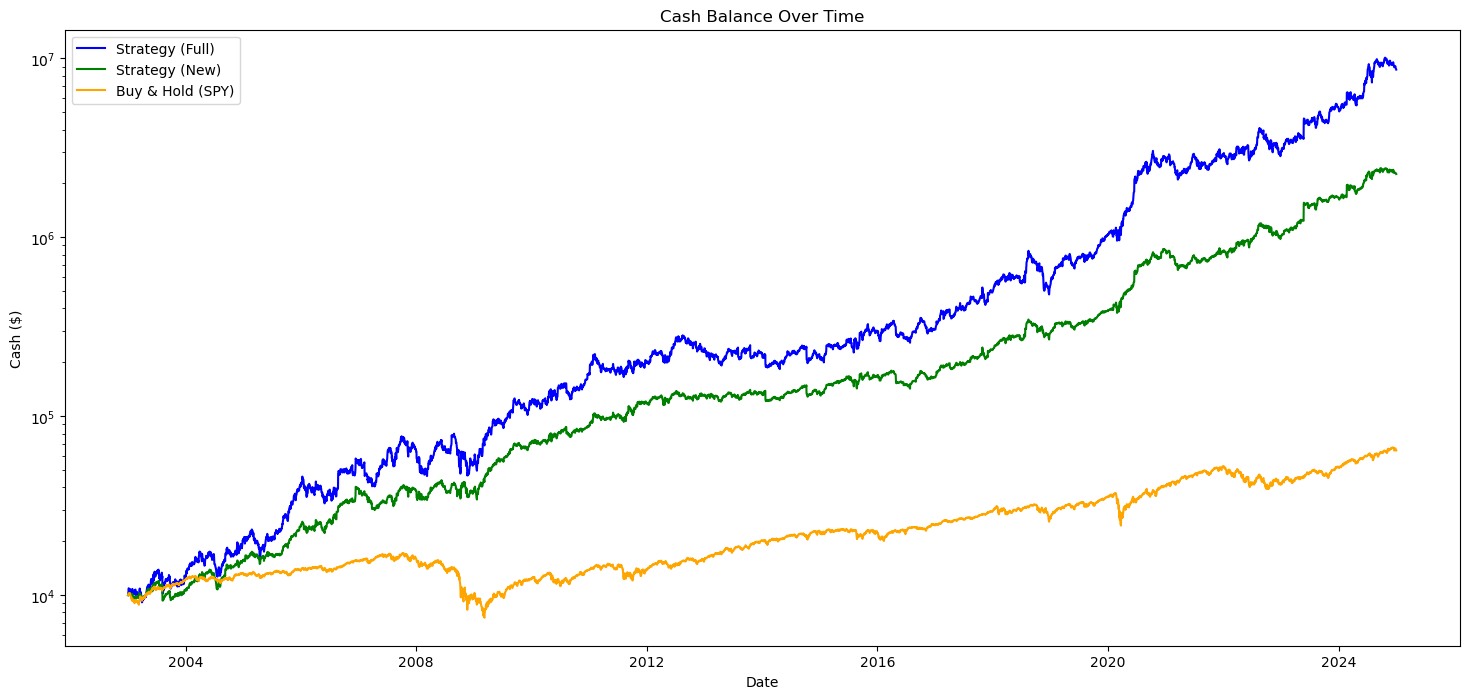

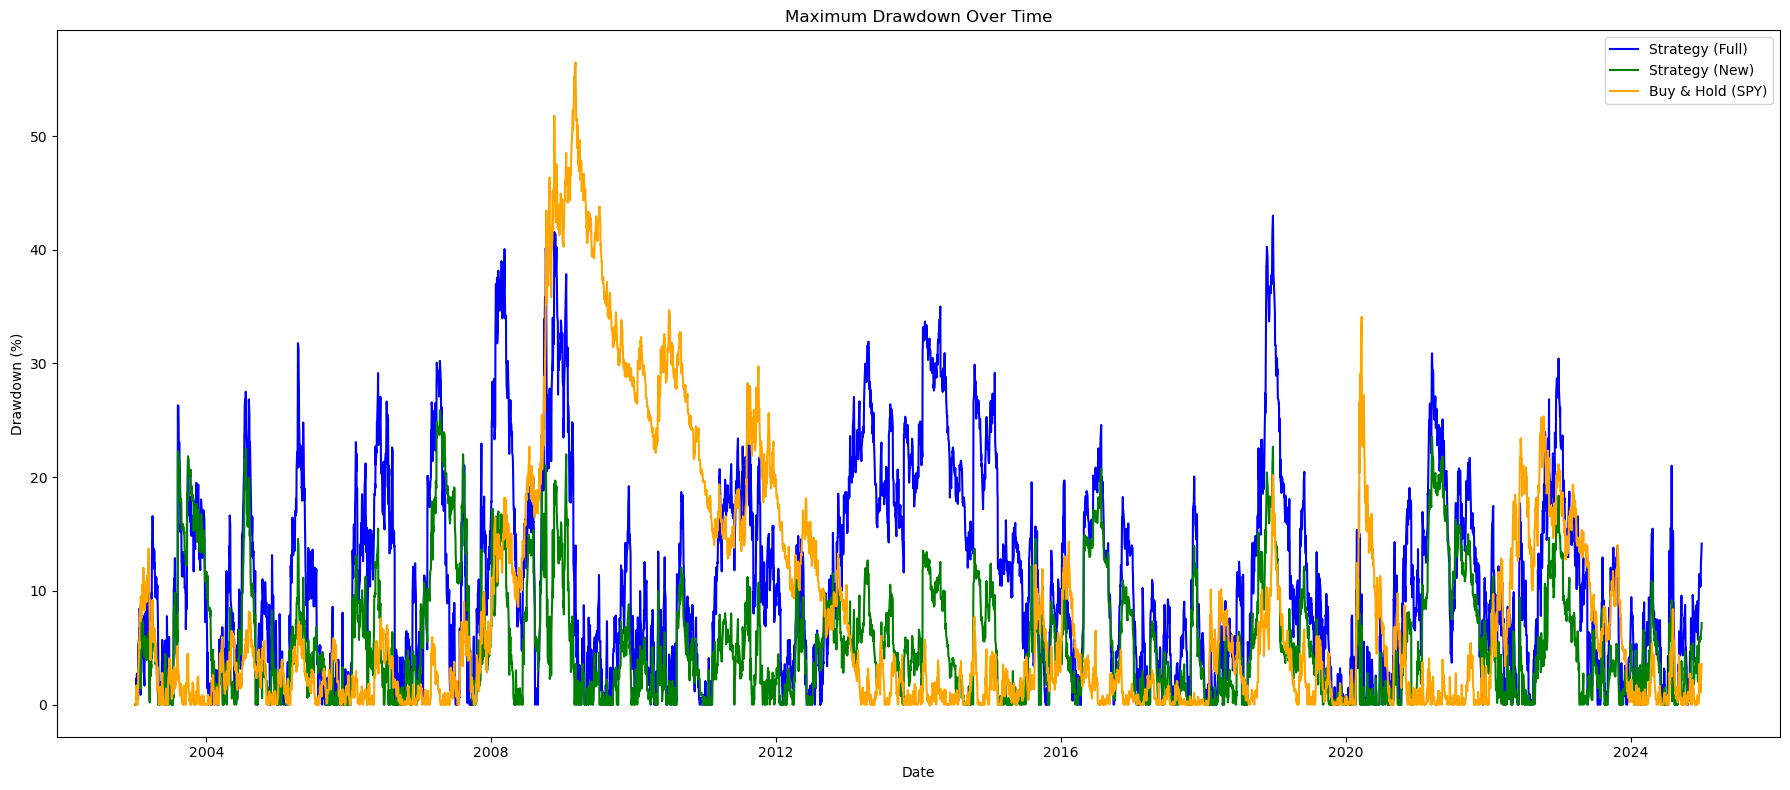

Final Cash: $8,652,204.22
Net Profit: $8,642,204.22
Total Trades Made: 2867


In [434]:
def strategy_with_dates(cash, goal, datas):
    """
    Simulates the strategy and plots cash vs. date.
    """
    start_date = datas[0].index[0]
    start_cash = cash

    # Initialize variables to track multiple strategies
    simulations = [cash]
    dates = [start_date]
    max_cash = cash
    drawdowns = [0]

    cash_2 = cash
    simulations_2 = [cash_2]
    max_cash_2 = cash_2
    drawdowns_2 = [0]

    cash_3 = cash
    simulations_3 = [cash_3]
    max_cash_3 = cash_3
    drawdowns_3 = [0]

    cash_4 = cash
    simulations_4 = [cash_4]
    max_cash_4 = cash_4
    drawdowns_4 = [0]

    cash_bm = cash
    simulations_bm = [cash_bm]
    max_cash_bm = cash_bm
    drawdowns_bm = [0]

    # Iterate through the maximum length of the datasets
    for index in range(len(datas[0]) - 1):
        current_row_spy = datas[0].iloc[index]
        next_row_spy = datas[0].iloc[index + 1]
        current_date = current_row_spy.name
        next_date = next_row_spy.name

        # Initialize flag to track if a trade occurs
        trade_occurred = False

        # Loop through other datasets (excluding the SPY dataset)
        for i, data in enumerate(datas[1:]):
            if index >= len(data) - 1:  # Skip if index exceeds the dataset's length
                continue

            current_row = data.iloc[index]
            next_row = data.iloc[index + 1]
            
            states_16 = current_row['16_States']
            states_8 = current_row['8_States']
            states_4 = current_row['4_States']
            states_2 = current_row['2_States']
            pct_change = next_row['Pct_Change']
    
            if states_16 == 'DDDD':
                cash_3 += cash_3 * pct_change * 1.0
            elif states_8 == 'DDD':
                cash_3 += cash_3  * pct_change * 0.9
            elif states_4 == 'DD':
                cash_3 += cash_3 * pct_change  * 0.7
            elif states_2 == 'D':
                cash_3 += cash_3 * pct_change * 0.3
            else: 
                pass

            # Check if the state is 'D' (down state for trading condition)
            if states_2 == 'D':
                # Update cash values based on strategies
                cash += cash * pct_change
                cash_2 += cash_2 * kelly * pct_change
                cash_4 += cash_4 * (2 * kelly * pct_change)
                symbol = ticker_symbols[i]
                # print(next_date, symbol, round(pct_change*100, 2))
                break

        # Update Buy & Hold strategy (SPY baseline)
        initial_price_bm = datas[0].iloc[0]["Close"]
        current_price_bm = next_row_spy["Close"]
        cash_bm = start_cash * (current_price_bm / initial_price_bm)

        simulations.append(cash)
        simulations_2.append(cash_2)
        simulations_3.append(cash_3)
        simulations_4.append(cash_4)
        simulations_bm.append(cash_bm)

        # Track max cash and drawdowns
        max_cash = max(max_cash, cash)
        drawdowns.append((max_cash - cash) / max_cash * 100)

        max_cash_2 = max(max_cash_2, cash_2)
        drawdowns_2.append((max_cash_2 - cash_2) / max_cash_2 * 100)

        max_cash_3 = max(max_cash_3, cash_3)
        drawdowns_3.append((max_cash_3 - cash_3) / max_cash_3 * 100)
        max_cash_4 = max(max_cash_4, cash_4)
        drawdowns_4.append((max_cash_4 - cash_4) / max_cash_4 * 100)

        max_cash_bm = max(max_cash_bm, cash_bm)
        drawdowns_bm.append((max_cash_bm - cash_bm) / max_cash_bm * 100)

        # Append the date after valid data processing
        dates.append(next_date)

    # Plot the results
    plt.figure(figsize=(18, 8))

    # Plot cash balance vs. date for all strategies
    plt.plot(dates, simulations, label='Strategy (Full)', color='blue')
    # plt.plot(dates, simulations_2, label='Strategy (Kelly)', color='purple')
    plt.plot(dates, simulations_3, label='Strategy (New)', color='green')
    # plt.plot(dates, simulations_4, label='Strategy (Kelly 2x)', color='red')
    plt.plot(dates, simulations_bm, label='Buy & Hold (SPY)', color='orange')
    plt.title('Cash Balance Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cash ($)')
    plt.legend()
    plt.yscale('log')  # Set y-axis to log scale

    # Plot drawdowns vs. date for all strategies
    plt.figure(figsize=(18, 8))
    plt.plot(dates, drawdowns, label='Strategy (Full)', color='blue')
    # plt.plot(dates, drawdowns_2, label='Strategy (Kelly)', color='purple')
    plt.plot(dates, drawdowns_3, label='Strategy (New)', color='green')
    # plt.plot(dates, drawdowns_4, label='Strategy (Kelly 2x)', color='red')
    plt.plot(dates, drawdowns_bm, label='Buy & Hold (SPY)', color='orange')
    plt.title('Maximum Drawdown Over Time')
    plt.xlabel('Date')
    plt.ylabel('Drawdown (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return simulations, dates

cash = 10000
start_date = "2003-01-01"
end_date = "2025-01-01"
ticker_symbols = [ "SPY", "AAPL", "NVDA", "GOOG", "AMZN", "AMD", "AVGO", "CRM", "KO", "JPM", "LLY", "UNH", "COST", "XOM", "CVX"]
# ticker_symbols = [ "SPY", "SPY"]

datas = []

# Iterate over the ticker symbols and fetch the data
for ticker_symbol in ticker_symbols:
    data = download_stock_data(ticker_symbol, start_date, end_date)
    datas.append(data)
    
simulations, dates = strategy_with_dates(cash, goal, datas)

print(f"Final Cash: ${simulations[-1]:,.2f}")
print(f"Net Profit: ${simulations[-1] - cash:,.2f}")
print(f"Total Trades Made: {trade_count}")
